<h1><center> MSIN0166: Data Engineering Group Assignment</h1>
    <h2><center> Group 5</h2>
           <h3><center> Due: 12 April 2022 10:00am</h3>

* [1.0 Introduction](#1.0-Introduction)
* [2.0 Structure of the project](#2.0-Structure-of-the-project)
    * [2.1 Data Storage](#2.1-Data-Storage)
    * [2.2 Source Version Control](#2.2-Source-Version-Control)
    * [2.3 Automate Terraform with Github Actions](#2.3-Automate-Terraform-with-Github-Actions)
    * [2.4 Data Lineage](#2.4-Data-Lineage)
* [3.0 Data Mining](#3.0-Data-Mining)
    * [3.1 Game results](#3.1-Game-results)
    * [3.2 Athlete Information Dataset](#3.2-Athlete-Information-Dataset)
    * [3.3 Twitter Dataset](#3.3-Twitter-Dataset)
        * [3.3.1 NLP](#3.3.1-NLP)
* [4.0 Data Transformation](#4.0-Data-Transformation)
    * [4.1 Subsets the data frame](#4.1-Subsets-the-data-frame)
* [5.0 Write into PostgreSQL database](#5.0-Write-into-PostgreSQL-database)
    * [5.1 SQL query](#5.1-SQL-query)
* [6.0 Limitations and Further steps](#6.0-Limitations-and-Further-steps)
* [7.0 Conclusion](#7.0-Conclusion)
* [Reference](#Reference)
* [Appendix]
    * [Meeting minutes 1]
    * [Meeting minutes 2]
    * [Meeting minutes 3]


# 1.0 Introduction

Data engineering, as the practice of designing and building systems for collecting, storing, and analyzing data at scale (Coursera, 2021), is a field that values the ability of data sourcing, processing and infrastructure construction. In the past few decades, the  information explosion brought by the tide of digitization enabled us to access data with higher volume and a larger variety in a more efficient and organized method. In this report, we aimed to develop the aforementioned data engineering skills by gathering new datasets from various online sources and applying different data processing methods to them.

Earlier this year, with the quadrennial Winter Olympics taking place in Beijing, winter sports have again drawn great attention around the world. Among all the events, short track speed skating (STK) has won the favour of many spectators with its exciting atmosphere. As a racing sport, time data is naturally vital in STK. But meanwhile, due to the frequent occurrence of accidents in this game, penalties and advances by referees also play an important role in the course of the games. Therefore, we believe that insights from previous Olympics STK games can be very valuable for national teams in their training strategy.

In order to achieve our research objectives, we gathered both the game results and athlete data of the STK games in the 2022 Beijing Winter Olympics from relevant authorities. Through data processing and pipeline creating, we were able to construct a basic querying system for STK teams to refer to in their future training, which allows the users to gain insights and experience from historical data. Moreover, apart from the quantitative data, we also built a model that can collect recent Twitter posts on STK and perform sentiment analysis models as a supplement from a different perspective.

In [1]:
# import the packages
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import os
import requests
from datetime import datetime
from IPython.display import Image

from dvc.api import make_checkpoint

# 2.0 Structure of the project

The graph shown below is the flow chart of how each file is connected and their input and output information. As this process needs to be reusable, we tried our best to reduce the coupling in the code. Only athlete information is dependent on the other files output (names of the athletes) in the stages before data transformation.

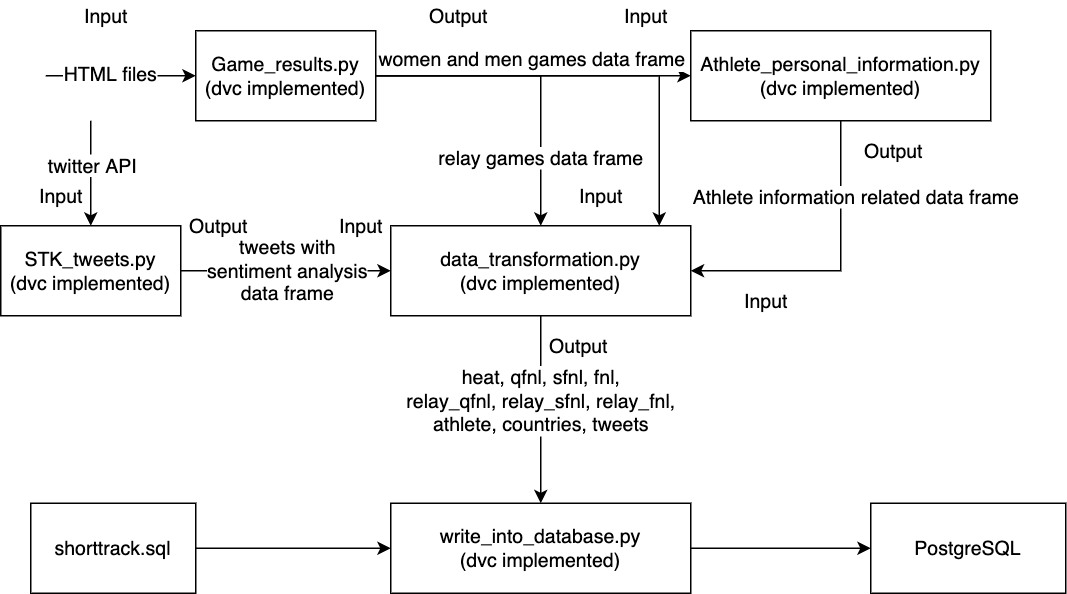

In [2]:
Image("/project/DataEngineering/graphs/structure.png", width = 900)

## 2.1 Data Storage

To make data more tractable and manageable, we have stored our data in a uniform format using parquet. The datasets gathered from the three different sources above are converted and stored in parquet format after collection and some basic data cleaning. Parquet is an open-source file format and a column-based storage type that is useful for dealing with big datasets since it allows us to query columns quickly. Due to the nature of our large volume of data, this data storage format improves efficiency as well as reduces storage requirements, including scan and deserialization time and financial cost. The free of charge nature of the parquet storage format would be an essential consideration for both individuals and organizations when working with large volume datasets.

As data will continue flowing in for our data analysis project, we designed a structured schema for our database aiming for efficient operation and maintenance. Our designed schema contains ten tables, with 7 different race tables, athlete information, country information and a Twitter data table. It allows us to extract information effectively. For example, if we want to quickly see the performance of a female athlete in terms of her game performance and her demographic information, we can simply look through our “athlete” table and see what games are suitable for her and what kind of games she tends to lose so that coaches are able to analyze her skill gaps. In addition, the age and the clubs are also important for club owners to find the next sports star and for coaches to make better training plans. We have also visually presented the schema using a DB diagram, showing the architecture of our designed database for better data management.

## 2.2 Source Version Control

While we are collaborating on the group project, source control allows us to keep track of the changes team members are making to the codes. Meanwhile, source control management systems record the history of the evolution of code which also benefits resolving merging conflicts. As Git is an open-source tool for the SCM systems, Git and Github will be used during the process of our group coursework. Each team member worked independently on our own branch, then we pushed the commits, made a pull request and finally merged it to the main branch. If conflicts arise at the merging stage, we would resolve them together and one of us would push a new commit.

**Link of the Github repository: https://github.com/Haiyun-Zou/DataEngineering**

## 2.3 Automate Terraform with Github Actions

In order to perform best practices and improve better collaborations, Terraform has been set up with Github actions and the Terraform CLI has been configured to automate the workflow. In the terraform.yml file, Terraform Format check is used to prevent anyone in the team from merging improperly formatted configuration to the main branch. Terraform Plan generates a plan when there is a pull request. When the main branch is updated, the workflow will apply the configuration.

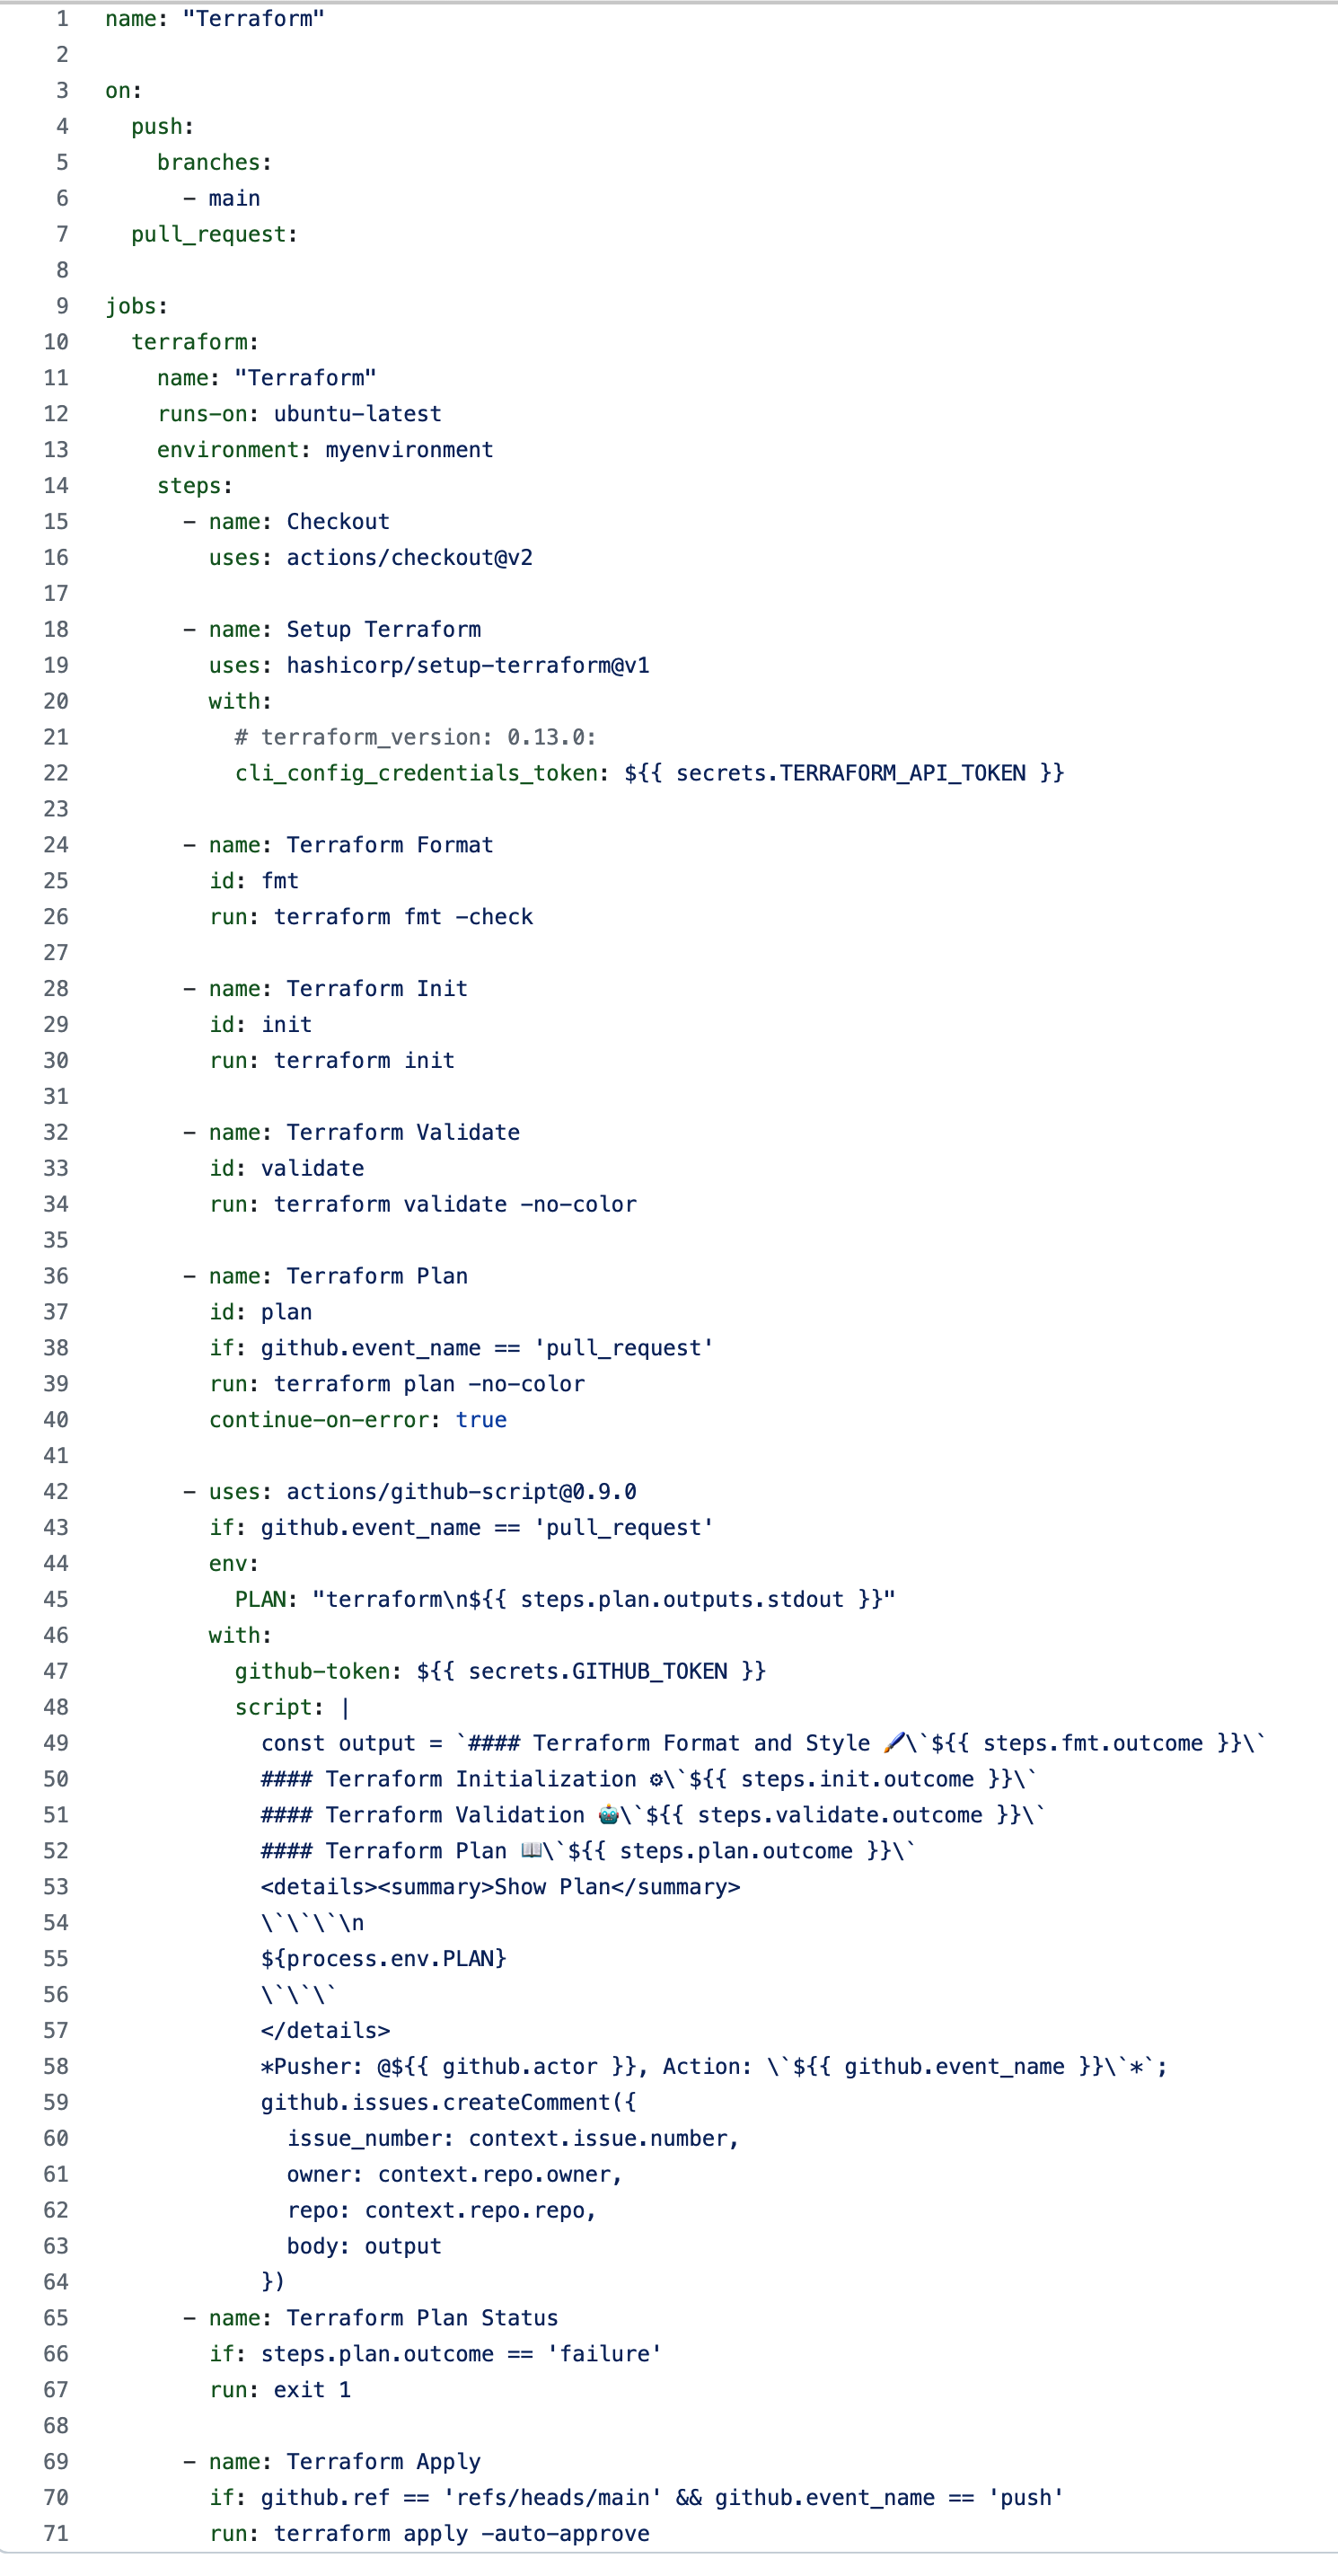

In [3]:
Image("/project/DataEngineering/graphs/tf.png", width = 400)

## 2.4 Data Lineage

Data Lineage shows the complete flow of the data from the sources to the transformation and the consumption stage. Data Lineage is a tool ensuring the accuracy and consistency of the data, from origins to the endpoint. It allows us to confirm whether it comes from a trustworthy source, whether correct data transformation has been applied and whether it has been loaded to the right place. It is particularly useful when machine learning has been deployed. When the data lineage of a dataset is known, reproducibility would be achieved an easier way.

Data Version Control(DVC) is used in this group assignment. DVC normally is for tracking machine learning experiments data and versions, in this assignment, it has been used to track the version of data frames in each stage. The auto script for running the complete process is also implemented based on the DVC actions. (shown in the two cells below)

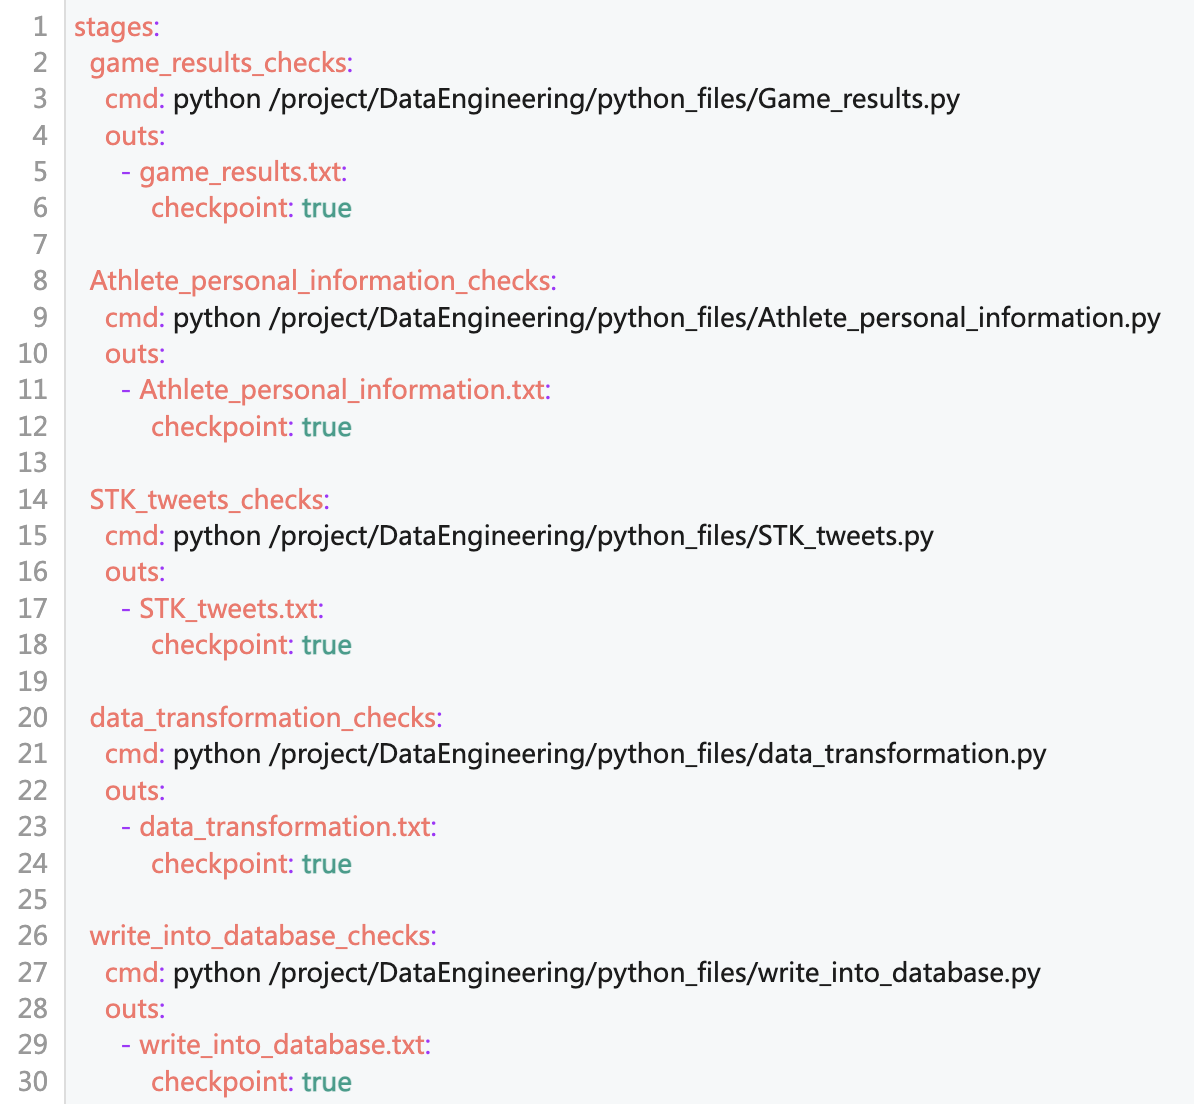

In [4]:
Image("/project/DataEngineering/graphs/dvc.png", width = 500)

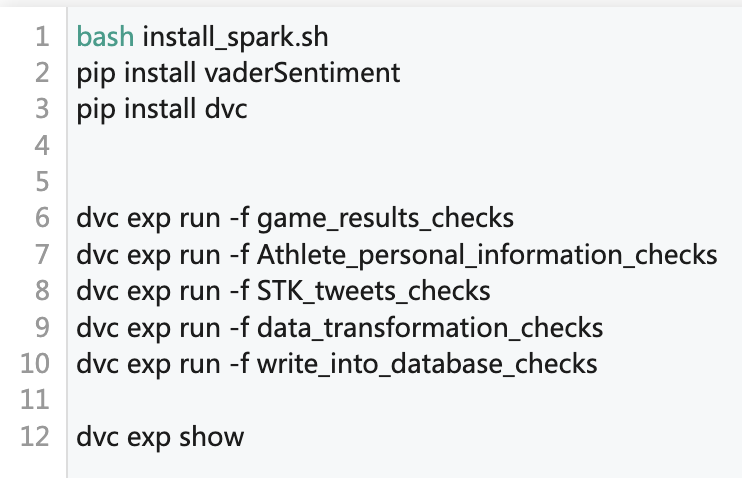

In [5]:
Image("/project/DataEngineering/graphs/auto.png", width = 400)

In terms of data processing, Apache Spark has been installed at the very beginning to utilize in-memory caching, and optimize query execution.

In [6]:
!bash install_spark.sh


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Hit:1 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Hi

spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/chr30.4.184.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/grayscale.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/iris_libsvm.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/kmeans_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/pagerank_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/pic_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/ridge-data/
spark-3.2.1-bin-hadoop3.2/data/mllib/ridge-data/lpsa.data
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_binary_classification_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_fpgrowth.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_isotonic_regression_libsvm_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_kmeans_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_lda_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_lda_libsvm_data.txt


spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPowerIterationClusteringExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPrefixSpanExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaQuantileDiscretizerExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRFormulaExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRandomForestClassifierExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRandomForestRegressorExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRobustScalerExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaSQLTransformerExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaStandardScalerExample.java
s

spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaCustomReceiver.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKerberizedKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaQueueStream.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaRecord.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaRecoverableNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaSqlNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaStateful

spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_kolmogorov_smirnov_test_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/isotonic_regression_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/k_means_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kernel_density_estimation_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kmeans.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/latent_dirichlet_allocation_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/linear_regression_with_sgd_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/logistic_regression.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/logistic_regression_with_lbfgs_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/multi_class_metrics_example.py
spark-3.2.1-bin-had

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DFSReadWriteTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DriverSubmissionTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ExceptionHandlingTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/GroupByTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/HdfsTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalALS.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalFileLR.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalKMeans.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalLR.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalPi.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaCrossValidationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaTrainValidationSplitExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MulticlassLogisticRegressionWithElasticNetExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MultilayerPerceptronClassifierExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NGramExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NaiveBayesExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NormalizerExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/OneHotEncoderExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/m

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestClassificationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestRegressionExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomRDDGeneration.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RankingMetricsExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RecommendationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SVDExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SVMWithSGDExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SampledRDDs.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SimpleFPGrowth.scala
spark-3.2.1-bin-hadoop3.

spark-3.2.1-bin-hadoop3.2/jars/commons-crypto-1.1.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-dbcp-1.4.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-io-2.8.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang-2.6.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang3-3.12.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-logging-1.1.3.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-math3-3.4.1.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-net-3.1.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-pool-1.5.4.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-text-1.6.jar
spark-3.2.1-bin-hadoop3.2/jars/compress-lzf-1.0.3.jar
spark-3.2.1-bin-hadoop3.2/jars/core-1.1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-client-2.13.0.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-framework-2.13.0.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-recipes-2.13.0.jar
spark-3.2.1-bin-hadoop3.2/jars/datanucleus-api-jdo-4.2.4.jar
spark-3.2.1-bin-hadoop3.2/jars/datanucleus-core-4.1.17.jar
spark-3.2.1-bin-hadoop3.2/jars/datanucleus-rdbms-4.1.19.jar
spark-3.

spark-3.2.1-bin-hadoop3.2/jars/parquet-hadoop-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-jackson-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/protobuf-java-2.5.0.jar
spark-3.2.1-bin-hadoop3.2/jars/py4j-0.10.9.3.jar
spark-3.2.1-bin-hadoop3.2/jars/pyrolite-4.30.jar
spark-3.2.1-bin-hadoop3.2/jars/rocksdbjni-6.20.3.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-collection-compat_2.12-2.1.1.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-compiler-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-library-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-parser-combinators_2.12-1.1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-reflect-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-xml_2.12-1.2.0.jar
spark-3.2.1-bin-hadoop3.2/jars/shapeless_2.12-2.3.3.jar
spark-3.2.1-bin-hadoop3.2/jars/shims-0.9.0.jar
spark-3.2.1-bin-hadoop3.2/jars/slf4j-api-1.7.30.jar
spark-3.2.1-bin-hadoop3.2/jars/slf4j-log4j12-1.7.30.jar
spark-3.2.1-bin-hadoop3.2/jars/snakeyaml-1.27.jar
spark-3.2.1-bin-hadoop3.2/jars/snappy-java-1.1.8.

spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/copybutton.js
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/pyspark.css
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/class.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/class_with_docs.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/conf.py
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/contributing.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/debugging.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/index.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/setting_ide.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/testing

spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/shared.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/shared.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/pipeline.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/pipeline.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/recommendation.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/recommendation.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/regression.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/regression.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/stat.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/stat.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/tests/
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/tests/__init__.py
spark-3.2.1-bin-hadoop3.2/

spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/ml.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/mlflow.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/namespace.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/numpy_compat.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/core.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/matplotlib.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/plotly.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/series.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/accessors.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/utils.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/sql_processor.py
spark-3.2.1-

spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/conf.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/conf.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/dataframe.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/dataframe.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/group.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/group.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/
spark-3.2.1-bin-hadoop3.2/python/

spark-3.2.1-bin-hadoop3.2/python/pyspark/version.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/worker.py
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/PKG-INFO
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/SOURCES.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/dependency_links.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/requires.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/top_level.txt
spark-3.2.1-bin-hadoop3.2/python/run-tests
spark-3.2.1-bin-hadoop3.2/python/run-tests-with-coverage
spark-3.2.1-bin-hadoop3.2/python/run-tests.py
spark-3.2.1-bin-hadoop3.2/python/setup.cfg
spark-3.2.1-bin-hadoop3.2/python/setup.py
spark-3.2.1-bin-hadoop3.2/python/test_coverage/
spark-3.2.1-bin-hadoop3.2/python/test_coverage/conf/
spark-3.2.1-bin-hadoop3.2/python/test_coverage/conf/spark-defaults.conf
spark-3.2.1-bin-hadoop3.2/python/test_coverage/coverage_daemon.py
spark-3.2.1-bin-hadoop3.2/python/test_coverage/sitecusto

In [7]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/project/spark-3.2.1-bin-hadoop3.2"

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("PySpark App") \
    .config("spark.jars", "postgresql-42.3.2.jar") \
    .getOrCreate()

# 3.0 Data Mining

As mentioned in the introduction section, the datasets we collected for this report contain three main parts, the game results data from the 2022 Winter Olympics, STK athlete data, and recent Twitter posts on STK related topics. 

## 3.1 Game results

Since we were initially interested in analyzing the general performance of STK games, we first gathered the full game results of STK races of the 2022 Winter Olympics by web scraping from the International Olympic Committee (IOC) official website (International Olympic Committee, 2022), using Beautiful Soup, a widely used  Python package for parsing HTML and XML documents, We first defined a 'get_file' function as a helper function to save the information pages from IOC as HTML files for further data scraping. Then we defined the function to get the needed information such as time, country and athlete from the saved HTML files using regular expressions. The data scraping was done by defined functions, which not only saves the repeated work but also provides usability of this approach for similar problems in the future.

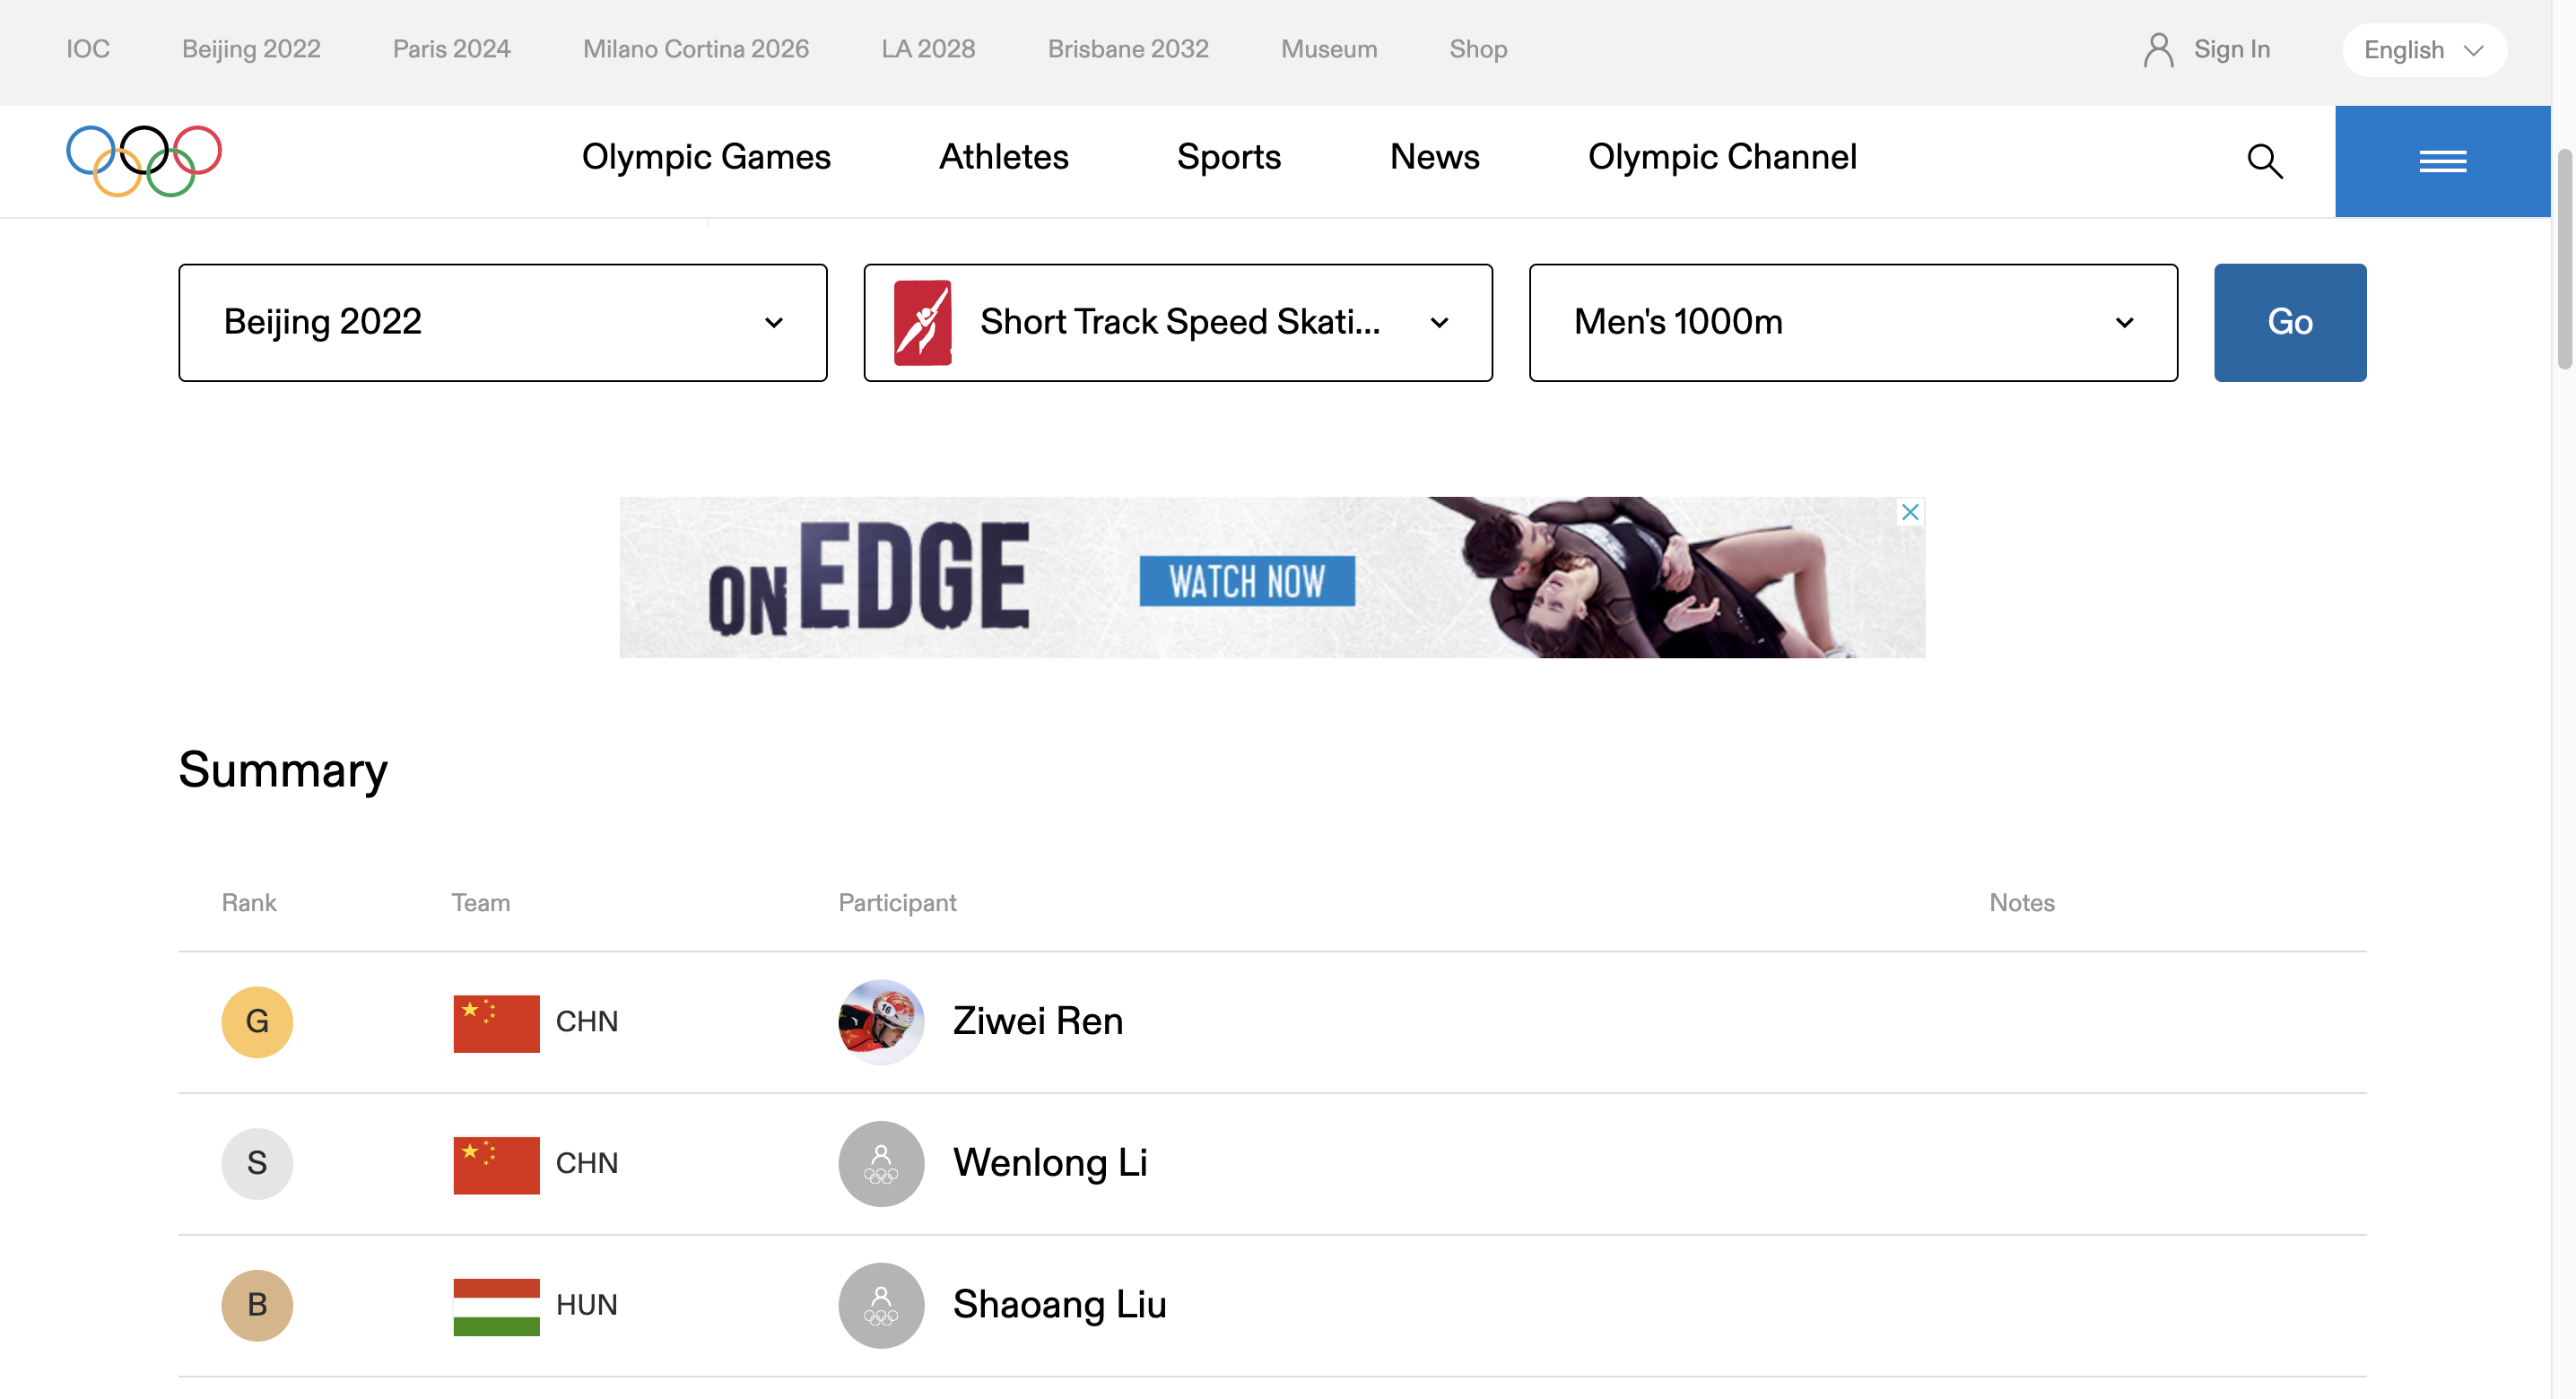

In [9]:
Image("/project/DataEngineering/graphs/screenshot_current.png", width = 800)

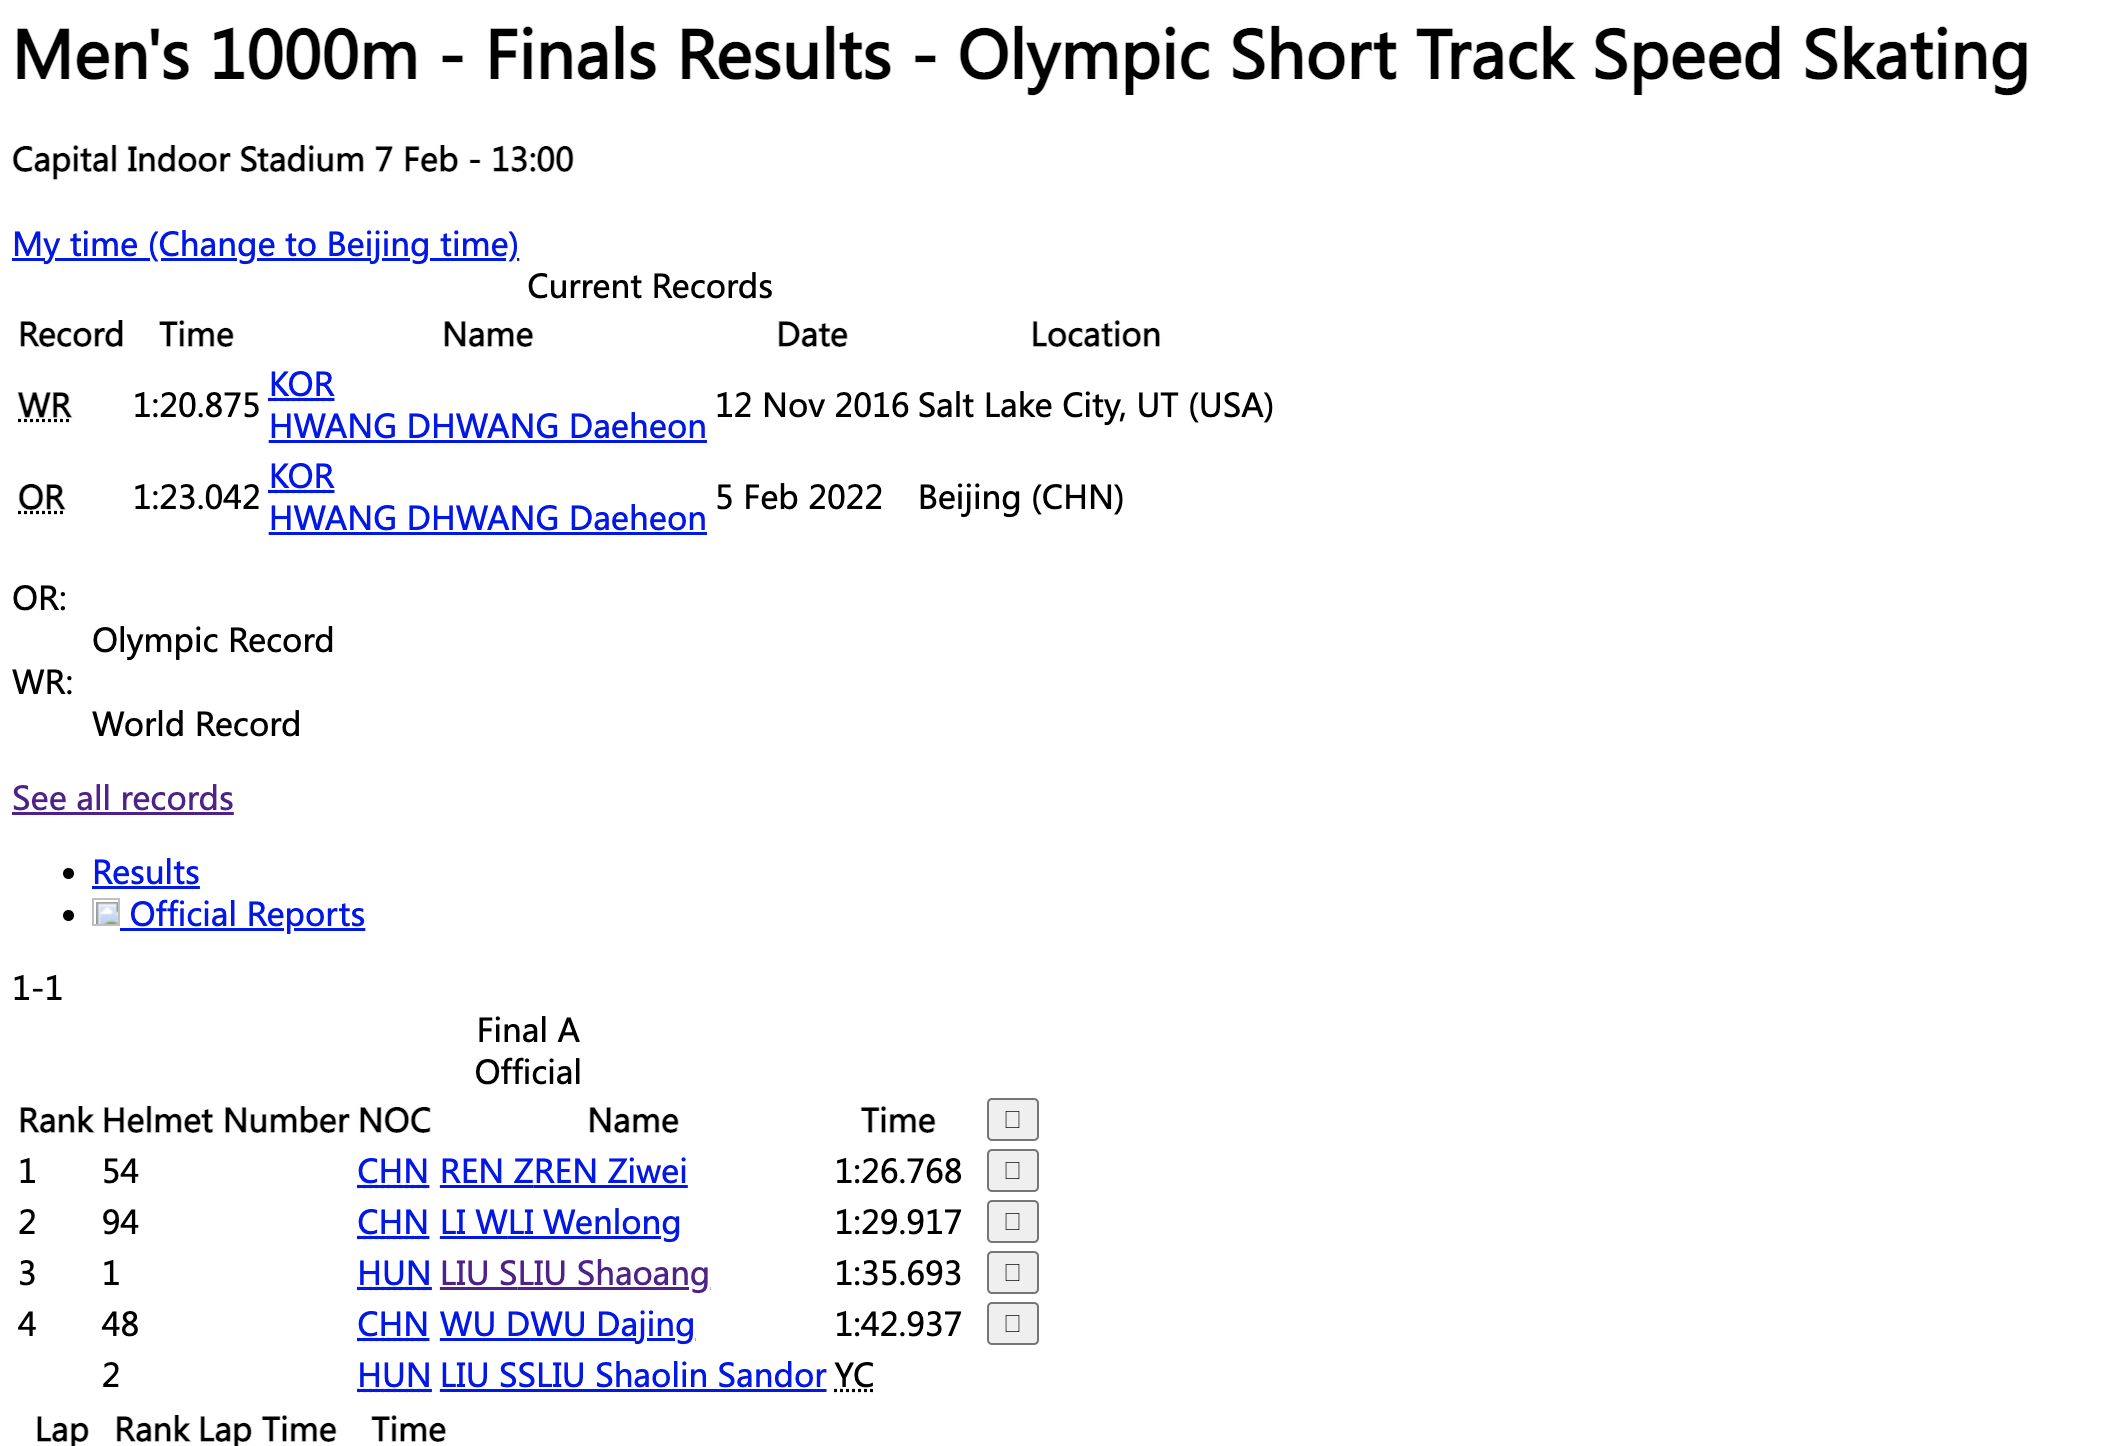

In [10]:
Image("/project/DataEngineering/graphs/html_screenshot.png", width = 800)

It is worth noticing that, when we collected the game results data in early March, as the 2022 Paralympic Winter Games were still taking place, all detailed game results of each sport in the 2022 Winter Olympics including the exact time and penalty record for each athlete starting from the group qualifying stage were still available on IOC website. While entering April, with the Paralympic also closed, the IOC downsized its data for the 2022 Games, keeping only final rankings, as it did for all previous Games. This is a routine data management step for IOC, taking into account practical situations, but it also demonstrates the importance of timely data collection, storage and analysis. (shown as the two cells above)

In [11]:
def get_file(path):
    '''
    function to get the file and convert it into html format with BeautifulSoup
    '''
    with open(path, 'r') as f:
        contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')
    soup_body = str(soup.body)
    return soup_body

In addition, when browsing the original data from the IOC website, we noticed that due to the variance in the competition format, the data for men's/women's singles and relay games are slightly different. In relay games, instead of athletes' names and helmet numbers, only the country names are recorded. Therefore, to avoid differentials in column numbers, the results of single games and relay games are collected by two similar but separate functions and recorded as two different datasets.

In [12]:
def women_men_games(event, paths, df):
    '''
    function using regular expression to get each columns in the html file
    '''
    soup_body = get_file(paths)
    pattern_country = r'<div class="playerTag" country="(.*)" register='
    pattern_name = r'<td data-sort="(.*)">'
    pattern_time = r'</span></a></div></div></td>\n<td class="text-right">\n(.*)'
    pattern_helmet = r'<td class="text-right d-none d-md-table-cell">\n(.*)</td>'
    pattern_group = r'splitContentResult-STK(.*)" role="row"'
    pattern_rank = r'<td class="text-right sorting_1" data-sort="(.*)">'
    pattern_Q_q = r'<td class="text-right">\n([\s\S]*?)\n</td>\n<td class="text-center d-none d-md-table-cell">'

    country = re.findall(pattern_country,soup_body)
    name = re.findall(pattern_name,soup_body)
    time = re.findall(pattern_time,soup_body)
    helmet = re.findall(pattern_helmet,soup_body)
    group_info =  re.findall(pattern_group,soup_body)
    rank =  re.findall(pattern_rank,soup_body)
    qualified = re.findall(pattern_Q_q,soup_body)

    time = [i.replace('</td>', '').strip() if 'td' in i else 'No Time' if 'No Time' in i else i for i in time]

    helmet = [int(i.strip()) for i in helmet]

    country = country[2:]

    group = [i[i.index(event)+len(event):i.index(event)+len(event)+7] for i in group_info]
    
    game_name = [i[:i.index(event)+len(event)].replace('-', ' ') for i in group_info]

    qualified = [re.findall(r'">(.*)</abbr></strong>',i)  for i in qualified]
    
    
    df['country'] = country
    df['helmet_number'] = helmet
    df['name'] = name
    df['group'] = group
    df['game'] = game_name
    df['rank'] = rank
    df['time'] = time
    df['qualified'] = qualified
    make_checkpoint()
    return df

In [13]:
# get all the path for all html files
list_files = list(os.listdir('/project/DataEngineering/Html_files'))

In [14]:
# convert the file path into relative path
list_files = ['/project/DataEngineering/Html_files/' + i for i in list_files]

In [15]:
# create all the data frames
df_W500_sfnl = pd.DataFrame()
df_M1000_heat = pd.DataFrame()
df_M500_qfnl = pd.DataFrame()
df_M1000_fnl = pd.DataFrame()
df_M500_heat = pd.DataFrame()
df_M1000_qfnl = pd.DataFrame()
df_W1000_sfnl = pd.DataFrame()
df_M500_fnl = pd.DataFrame()
df_W1000_qfnl = pd.DataFrame()
df_W500_fnl = pd.DataFrame()
df_M500_sfnl = pd.DataFrame()
df_W500_heat = pd.DataFrame()
df_W500_qfnl = pd.DataFrame()
df_M1000_sfnl = pd.DataFrame()
df_W1000_heat = pd.DataFrame()
df_W1000_fnl = pd.DataFrame()
df_M1500_qfnl = pd.DataFrame()
df_W1500_sfnl = pd.DataFrame()
df_M5000R_fnl = pd.DataFrame()
df_MixR_sfnl = pd.DataFrame()
df_W3000R_fnl = pd.DataFrame()
df_M1500_fnl = pd.DataFrame()
df_W1500_fnl = pd.DataFrame()
df_MixR_fnl = pd.DataFrame()
df_W3000R_sfnl = pd.DataFrame()
df_M1500_sfnl = pd.DataFrame()
df_W1500_qfnl = pd.DataFrame()
df_M5000R_sfnl = pd.DataFrame()
df_MixR_qfnl = pd.DataFrame()

In [16]:
# form them into two lists 1) the normal men and women games; 2) the relay games
list_df = [
    df_W500_sfnl,
    df_M1000_heat,
    df_M500_qfnl,
    df_M1000_fnl,
    df_M500_heat,
    df_M1000_qfnl,
    df_W1000_sfnl,
    df_M500_fnl,
    df_W1000_qfnl,
    df_W500_fnl,
    df_M500_sfnl,
    df_W500_heat,
    df_W500_qfnl,
    df_M1000_sfnl,
    df_W1000_heat,
    df_W1000_fnl,
    df_M1500_qfnl,
    df_W1500_sfnl,
    df_M1500_fnl,
    df_W1500_fnl,
    df_M1500_sfnl,
    df_W1500_qfnl,
]

list_relay_df = [
    df_M5000R_fnl,
    df_MixR_sfnl,
    df_W3000R_fnl,
    df_MixR_fnl,
    df_W3000R_sfnl,
    df_M5000R_sfnl,
    df_MixR_qfnl
]

In [17]:
# event information for two list respectively
list_event = [
'SFNL',
'HEAT',
'QFNL',
'FNL',
'HEAT',
'QFNL',
'SFNL',
'FNL',
'QFNL',
'FNL',
'SFNL',
'HEAT',
'QFNL',
'SFNL',
'HEAT',
'FNL',
'QFNL',
'SFNL',
'FNL',
'FNL',
'SFNL',
'QFNL'
]

list_relay_event = [
    'FNL',
    'SFNL',
    'FNL',
    'FNL',
    'SFNL',
    'SFNL',
    'QFNL']

In [18]:
# remove the relay files from the list of paths and add them into the list of paths for relay only
list_files.remove("/project/DataEngineering/Html_files/Men's 5000m Relay - Finals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Mixed Team Relay - Semifinals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Women's 3000m Relay - Finals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Mixed Team Relay - Finals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Women's 3000m Relay - Semifinals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Men's 5000m Relay - Semifinals Results - Olympic Short Track Speed Skating.html")
list_files.remove("/project/DataEngineering/Html_files/Mixed Team Relay - Quarterfinals Results - Olympic Short Track Speed Skating.html")

list_relay_files = ["/project/DataEngineering/Html_files/Men's 5000m Relay - Finals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Mixed Team Relay - Semifinals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Women's 3000m Relay - Finals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Mixed Team Relay - Finals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Women's 3000m Relay - Semifinals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Men's 5000m Relay - Semifinals Results - Olympic Short Track Speed Skating.html",
             "/project/DataEngineering/Html_files/Mixed Team Relay - Quarterfinals Results - Olympic Short Track Speed Skating.html"]

In [19]:
# call the function to update the data frames
for i,df in enumerate(list_df):
    df = women_men_games(list_event[i], list_files[i],df)

In [20]:
def relay(event, paths, df):
    '''
    function using regular expression to get the information for relay games
    '''
    soup_body = get_file(paths)
    pattern_country = r'<td class="text-right" data-sort="(.*)">\n<div'
    pattern_name = r'<td data-sort="(.*)">'
    pattern_time = r'</a></div></div></td>\n<td class="text-right">\n(.*)'
    pattern_group = r'splitContentResult-STK(.*)" role="row"'
    pattern_rank = r'<td class="text-right sorting_1" data-sort="(.*)">'
    pattern_Q_q = r'<td class="text-right">\n([\s\S]*?)\n</td>\n<td class="text-center d-none d-md-table-cell">'

    country = re.findall(pattern_country,soup_body)
    name = re.findall(pattern_name,soup_body)
    time = re.findall(pattern_time,soup_body)
    group_info =  re.findall(pattern_group,soup_body)
    rank =  re.findall(pattern_rank,soup_body)
    qualified = re.findall(pattern_Q_q,soup_body)
    
    time = [i.replace('</td>', '').strip() if 'td' in i else 'No Time' if 'No Time' in i else i for i in time]

    group = [i[i.index(event)+len(event):i.index(event)+len(event)+6] for i in group_info]
    
    game_name = [i[:i.index(event)+len(event)].replace('-', ' ') for i in group_info]


    qualified = [re.findall(r'">(.*)</abbr></strong>',i)  for i in qualified]


    df['country'] = country
    df['name'] = name
    df['group'] = group
    df['game'] = game_name
    df['rank'] = rank
    df['time'] = time
    df['qualified'] = qualified
    make_checkpoint()
    return df

In [21]:
# call the relay function
for i,df in enumerate(list_relay_df):
    df = relay(list_relay_event[i], list_relay_files[i],df)

In [22]:
def concat(df,list_):
    '''
    function to concat all the information and trim the time column
    '''
    for i in list_:
        df = df.append(i)
    list_time = []
    for count, time in enumerate(df['time']):
        if '>' in time:
            list_time.append(re.findall(r'>(.*)</abbr>', time)[0])
        else:
            list_time.append(time)
    df['time'] = list_time
    make_checkpoint()
    return df

In [23]:
# create a new data frame and call the function to store all the women and men game information
df_w_m_game = pd.DataFrame()
df_w_m_game = concat(df_w_m_game, list_df)

In [24]:
# create a new data frame and call the function to store all the relay game information
df_relay_game = pd.DataFrame()
df_relay_game = concat(df_relay_game, list_relay_df)

Description of columns in 'df_w_m_game': 

| Column Name   | Description                                                                                                                                                                                                                              |
|---------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| country       | Three letter ISO country code of which the athlete represents                                                                                                                                                                            |
| helmet_number | Number on the athlete’s helmet                                                                                                                                                                                                           |
| name          | Name of the athlete                                                                                                                                                                                                                      |
| group         | Group number the athlete competed in                                                                                                                                                                                                     |
| game          | Type of game the athlete competed in<br>first letter (M/W) indicate gender, <br>number indicate length of race, <br>last four letters represent <br>level of game (FNL= final, SFNL = semi-final, QFNL = quarter-final, HEAT = group) |
| rank          | Ranking of the athlete’s grade within the group                                                                                                                                                                                          |
| time          | Time the athlete used to complete the race                                                                                                                                                                                               |
| qualified     | Whether and how (including advanced by referee)<br>the athlete was qualified for next stage race                                                                                                                                         |

In [25]:
df_w_m_game

country  helmet_number                   name    group  \
0      ITA              3        FONTANA Arianna  000100-   
1      CAN             35             BOUTIN Kim  000100-   
2      ROC            141         SEREGINA Elena  000100-   
3      CAN             50         CHARLES Alyson  000100-   
4      ITA             97      VALCEPINA Arianna  000100-   
..     ...            ...                    ...      ...   
31     BEL              5           DESMET Hanne  000600-   
32     ROC              7      PROSVIRNOVA Sofia  000600-   
33     CHN             42          ZHANG Chutong  000600-   
34     POL             16    MALISZEWSKA Natalia  000600-   
35     ROC              9  EFREMENKOVA Ekaterina  000600-   

                       game rank      time qualified  
0   W500M              SFNL    1    42.387      [QA]  
1   W500M              SFNL    2    42.664      [QA]  
2   W500M              SFNL    3    42.685      [QB]  
3   W500M              SFNL    4    42.829      [QB]  
4   W500M              SFNL    5    44.044        []  
..                      ...  ...       ...       ...  
31  W1500M             QFNL    2  2:18.931       [Q]  
32  W1500M             QFNL    3  2:19.432       [Q]  
33  W1500M             QFNL    4  2:19.839       [q]  
34  W1500M             QFNL    5  2:25.850        []  
35  W1500M             QFNL    6   No Time        []  

[429 rows x 8 columns]

Description of columns in 'df_relay_game':

| Column Name | Description                                                                                                                                                                                                                                    |
|-------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| country     | Three letter ISO country code of the team                                                                                                                                                                                                      |
| name        | Name of the country                                                                                                                                                                                                                            |
| group       | Group number the team competed in                                                                                                                                                                                                              |
| game        | the first letter indicates gender (Men/Women/Mixed), <br>the number indicates the length of the race, <br>last four letters represent the level of the game <br>(FNL= final, SFNL = semi-final, QFNL = quarter-final, HEAT = group) |
| rank        | Ranking of the team’s grade within the group                                                                                                                                                                                                   |
| time        | Time the team used to complete the race                                                                                                                                                                                                        |
| qualified   | Whether and how (including advanced by the referee)<br>the team was qualified for next stage race                                                                                                                                                  |

In [26]:
df_relay_game

country                        name   group                     game rank  \
0      CAN                      Canada  -A0010   M5000MRY4          FNL    1   
1      KOR           Republic of Korea  -A0010   M5000MRY4          FNL    2   
2      ITA                       Italy  -A0010   M5000MRY4          FNL    3   
3      ROC                         ROC  -A0010   M5000MRY4          FNL    4   
4      CHN  People's Republic of China  -A0010   M5000MRY4          FNL    5   
5      HUN                     Hungary  -B0010   M5000MRY4          FNL    1   
6      NED                 Netherlands  -B0010   M5000MRY4          FNL    2   
7      JPN                       Japan  -B0010   M5000MRY4          FNL    3   
0      CAN                      Canada  000100  XRELAY4            SFNL    1   
1      ITA                       Italy  000100  XRELAY4            SFNL    2   
2      KAZ                  Kazakhstan  000100  XRELAY4            SFNL    3   
3      NED                 Netherlands  000100  XRELAY4            SFNL    4   
4      HUN                     Hungary  000200  XRELAY4            SFNL    1   
5      CHN  People's Republic of China  000200  XRELAY4            SFNL    2   
6      ROC                         ROC  000200  XRELAY4            SFNL    3   
7      USA    United States of America  000200  XRELAY4            SFNL    4   
0      NED                 Netherlands  -A0010   W3000MRY4          FNL    1   
1      KOR           Republic of Korea  -A0010   W3000MRY4          FNL    2   
2      CHN  People's Republic of China  -A0010   W3000MRY4          FNL    3   
3      CAN                      Canada  -A0010   W3000MRY4          FNL    4   
4      ITA                       Italy  -B0010   W3000MRY4          FNL    1   
5      POL                      Poland  -B0010   W3000MRY4          FNL    2   
6      ROC                         ROC  -B0010   W3000MRY4          FNL    3   
7      USA    United States of America  -B0010   W3000MRY4          FNL    4   
0      CHN  People's Republic of China  -A0010   XRELAY4            FNL    1   
1      ITA                       Italy  -A0010   XRELAY4            FNL    2   
2      HUN                     Hungary  -A0010   XRELAY4            FNL    3   
3      CAN                      Canada  -A0010   XRELAY4            FNL    4   
4      NED                 Netherlands  -B0010   XRELAY4            FNL    1   
5      KAZ                  Kazakhstan  -B0010   XRELAY4            FNL    2   
0      NED                 Netherlands  000100  W3000MRY4          SFNL    1   
1      CHN  People's Republic of China  000100  W3000MRY4          SFNL    2   
2      POL                      Poland  000100  W3000MRY4          SFNL    3   
3      ITA                       Italy  000100  W3000MRY4          SFNL    4   
4      CAN                      Canada  000200  W3000MRY4          SFNL    1   
5      KOR           Republic of Korea  000200  W3000MRY4          SFNL    2   
6      ROC                         ROC  000200  W3000MRY4          SFNL    3   
7      USA    United States of America  000200  W3000MRY4          SFNL    4   
0      CAN                      Canada  000100  M5000MRY4          SFNL    1   
1      ITA                       Italy  000100  M5000MRY4          SFNL    2   
2      JPN                       Japan  000100  M5000MRY4          SFNL    3   
3      CHN  People's Republic of China  000100  M5000MRY4          SFNL    4   
4      KOR           Republic of Korea  000200  M5000MRY4          SFNL    1   
5      ROC                         ROC  000200  M5000MRY4          SFNL    2   
6      NED                 Netherlands  000200  M5000MRY4          SFNL    3   
7      HUN                     Hungary  000200  M5000MRY4          SFNL    4   
0      CHN  People's Republic of China  000100  XRELAY4            QFNL    1   
1      ITA                       Italy  000100  XRELAY4            QFNL    2   
2      KOR           Republic of Korea  000100  XRELAY4            QFNL    3   
3  

In [27]:
# convert the data frame into spark data frame
w_m_game_spark_df = spark.createDataFrame(df_w_m_game)
relay_spark_df = spark.createDataFrame(df_relay_game)

In [28]:
w_m_game_spark_df.printSchema()

root
 |-- country: string (nullable = true)
 |-- helmet_number: long (nullable = true)
 |-- name: string (nullable = true)
 |-- group: string (nullable = true)
 |-- game: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- time: string (nullable = true)
 |-- qualified: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [29]:
relay_spark_df.printSchema()

root
 |-- country: string (nullable = true)
 |-- name: string (nullable = true)
 |-- group: string (nullable = true)
 |-- game: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- time: string (nullable = true)
 |-- qualified: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [30]:
# convert the data frame into parquet format
w_m_game_spark_df.write.parquet("/project/DataEngineering/parquet_files/w_m_game.parquet", mode = 'overwrite')
relay_spark_df.write.parquet("/project/DataEngineering/parquet_files/relay.parquet", mode = 'overwrite')
make_checkpoint()

## 3.2 Athlete Information Dataset

After gathering the game data, we decided to also collect more detailed information of all athletes who participated in the STK games of Beijing 2022 Winter Olympic Games. From a data analysis point of view, this further enriches our data set from a very different standpoint compared to the game results data. Meanwhile, from the perspective of practical utility, we believe that for professional sports competitions, athletes' individual status information in a certain season is also an important factor to determine their performance. Therefore, collecting data on both the game results and the athlete information can help us enrich the data sources and the dataset, and thus maximize the practical value.

In [31]:
# read the game results from the parquet file
w_m_game_df = spark.read.parquet("/project/DataEngineering/parquet_files/w_m_game.parquet").toPandas()

In [32]:
w_m_game_df

country  helmet_number                  name    group  \
0       CAN             50        CHARLES Alyson  000100-   
1       CAN             14     BRUNELLE Florence  000100-   
2       HUN             10       JASZAPATI Petra  000200-   
3       ROC            141        SEREGINA Elena  000200-   
4       USA             52           BINEY Maame  000200-   
..      ...            ...                   ...      ...   
424     USA             19            HEO Andrew  000100-   
425     CHN             48             WU Dajing  000100-   
426     KOR            195         PARK Janghyuk  000100-   
427     ITA              7         SIGHEL Pietro  000100-   
428     CAN             67  PIERRE-GILLES Jordan  000100-   

                        game rank      time qualified  
0    W500M              QFNL    4  1:07.206     [ADV]  
1    W500M              QFNL    5       PEN        []  
2    W500M              QFNL    1    43.476       [Q]  
3    W500M              QFNL    2    43.712       [Q]  
4    W500M              QFNL    3    46.099        []  
..                       ...  ...       ...       ...  
424  M1000M             QFNL    1  1:24.603       [Q]  
425  M1000M             QFNL    2  1:33.302       [Q]  
426  M1000M             QFNL    3   No Time     [ADV]  
427  M1000M             QFNL    4       PEN        []  
428  M1000M             QFNL    5       PEN        []  

[429 rows x 8 columns]

Since we aim to only collect the information on athletes who participated in the individual STK games in the 2022 Beijing Winter Olympics, we first sorted and filtered all the unique athlete names from the dataset generated above ('w_m_game_df'). The filtered names and their country code formed a new data frame with 100 rows in total. Starting from only the names and country codes, we tried to gain more personal information about each athlete.

In [33]:
# get all the unique athlete information
athlete_info = w_m_game_df[['country', 'name','helmet_number']].groupby(['country','name']).nunique().reset_index().drop('helmet_number', axis = 1)

In [34]:
athlete_info

country              name
0      AUS     COREY Brendan
1      BEL      DESMET Hanne
2      BEL      DESMET Stijn
3      CAN       BLAIS Danae
4      CAN        BOUTIN Kim
..     ...               ...
95     USA        HEO Andrew
96     USA       LETAI Julie
97     USA    PIVIROTTO Ryan
98     USA    SANTOS Kristen
99     USA  STODDARD Corinne

[100 rows x 2 columns]

In [35]:
# set all the athlete name to lower case
athlete_info.name = [i.lower() for i in athlete_info.name]

In [36]:
# replace country code of ROC to RUS
athlete_info.country = athlete_info.country.replace(to_replace = 'ROC', value = 'RUS')

At first, we planned to gather the needed information from each athlete's Wikipedia page. However, after some trials, we found the idea not that feasible.  Firstly, as the editing of Wikipedia pages is almost completely open, the information display is not very structured, which makes it more difficult for us to scrape specific data. Moreover, the amount of information each athlete's Wikipedia page contains varies greatly, depending on their nationality, popularity and other factors. Some athletes don't even have their own Wikipedia pages. Not to mention the possibility of getting directed to other celebrities with the same name. Therefore, we gave up on the idea of collecting athletes' personal information from their Wikipedia pages.

After some searching, we found Short Track Online (STO), a website that systematically stores a large volume of STK related data including the personal information of the Olympic athletes we were looking for. On the STO website, we were able to quickly identify the unique ID number of each athlete in our data frame by their country code and name using the defined function 'get_id'. The function first navigates to the list of all STK athletes serving for the country by country code, and then finds the athlete by name and gets their ID number. The package used here is still Beautiful Soup. 

Among all 100 athletes, there were 6 whose unique IDs were not identified through the 'get_id' function. Taking a closer look, we found that this is caused by the non-English letters or different spacing in their names. Therefore, we manually replaced the name and successfully got their ID.

With their unique ID number, we were able to navigate to each athlete's information page and again use defined regular expressions functions to collect the data we need. But through observation, we also noticed the generating rule of their ID number, which contains information about their country code, gender and date of birth (shown below). Therefore, we were able to directly get the age and gender data for each athlete from their ID.

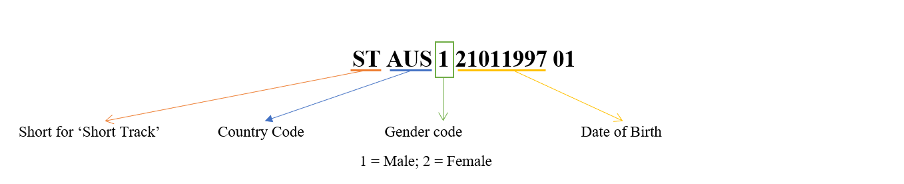

In [37]:
Image("/project/DataEngineering/graphs/id_description.png", width = 900)

In [38]:
def get_id (df, cols):
    '''
    function to get each athlete id
    '''
    dict_id = {}
    for c, n in zip(df[cols[0]], df[cols[1]]):
        URL =f"http://www.shorttrackonline.info/athletes.php?country={c}"
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, "html.parser")
        soup_body = str(soup.body)
        temp_dict_id_name = {''.join(k.lower().split(',')):v for k,v in zip (re.findall(r'">(.*)</a></td>\n', soup_body), re.findall(r'<a href="skaterbio.php\?id=(.*)">', soup_body))}
        if n in temp_dict_id_name.keys():
            dict_id[n] = temp_dict_id_name[n]
    return dict_id

In [39]:
dict_id = get_id(athlete_info, ['country', 'name'])

In [40]:
# merge the id information with the athlete data frame
athlete_info = athlete_info.merge(pd.DataFrame({'name':dict_id.keys(), 'id': dict_id.values()}), how = 'left', on = 'name', copy = False)
make_checkpoint()

In [41]:
athlete_info

country              name                id
0      AUS     corey brendan  STAUS12101199701
1      BEL      desmet hanne  STBEL22610199601
2      BEL      desmet stijn  STBEL11004199801
3      CAN       blais danae               NaN
4      CAN        boutin kim  STCAN21612199401
..     ...               ...               ...
95     USA        heo andrew  STUSA10705200101
96     USA       letai julie  STUSA22306200001
97     USA    pivirotto ryan  STUSA11405199501
98     USA    santos kristen  STUSA20211199401
99     USA  stoddard corinne  STUSA21508200101

[100 rows x 3 columns]

In [42]:
# check the NaN rows
athlete_info[athlete_info.id.isnull()]

country              name   id
3      CAN       blais danae  NaN
14     CHN        han yutong  NaN
28     FRA  lepape sebastien  NaN
63     KOR       lee juneseo  NaN
65     KOR     park janghyuk  NaN
82     RUS  airapetian denis  NaN

In [43]:
# manually replace the names
athlete_info.name = athlete_info.name.replace('blais danae', 'blais danaé')
athlete_info.name = athlete_info.name.replace('han yutong', 'han yu tong')
athlete_info.name = athlete_info.name.replace('lepape sebastien', 'lepape sébastien')
athlete_info.name = athlete_info.name.replace('lee juneseo', 'lee june seo')
athlete_info.name = athlete_info.name.replace('park janghyuk', 'park jang hyuk')
athlete_info.name = athlete_info.name.replace('airapetian denis', 'ayrapetyan denis')

In [44]:
athlete_info[athlete_info.id.isnull()]

country              name   id
3      CAN       blais danaé  NaN
14     CHN       han yu tong  NaN
28     FRA  lepape sébastien  NaN
63     KOR      lee june seo  NaN
65     KOR    park jang hyuk  NaN
82     RUS  ayrapetyan denis  NaN

In [45]:
# call the function again to get the rest of the athlete id
dict_id_second = get_id(athlete_info[athlete_info.id.isnull()], ['country', 'name'])

In [46]:
# get the new data frame for the NaN athlete
temp_df = pd.DataFrame({'name':dict_id_second.keys(), 'id': dict_id_second.values()})

In [47]:
# map the id and name into the athlete_info data frame
athlete_info.id.fillna(athlete_info['name'].map(dict_id_second), inplace=True)
make_checkpoint()

In [48]:
athlete_info

country              name                id
0      AUS     corey brendan  STAUS12101199701
1      BEL      desmet hanne  STBEL22610199601
2      BEL      desmet stijn  STBEL11004199801
3      CAN       blais danaé  STCAN21005199901
4      CAN        boutin kim  STCAN21612199401
..     ...               ...               ...
95     USA        heo andrew  STUSA10705200101
96     USA       letai julie  STUSA22306200001
97     USA    pivirotto ryan  STUSA11405199501
98     USA    santos kristen  STUSA20211199401
99     USA  stoddard corinne  STUSA21508200101

[100 rows x 3 columns]

In [49]:
# get the birth year from each id
athlete_info['birth_year'] = athlete_info['id'].apply(lambda x: x[-6:-2])

In [50]:
athlete_info['birth_year'] = athlete_info['birth_year'].astype(int)
make_checkpoint()

In [51]:
# get the age by 2022-birth_year
athlete_info['age'] = 2022 - athlete_info['birth_year']
make_checkpoint()

In [52]:
# get the gender information from the id
athlete_info['gender'] = athlete_info['id'].apply(lambda x: x[-11:-10])

In [53]:
# replace 1 and 2 with male and female
athlete_info.gender = athlete_info.gender.replace({'1': 'Male', '2': 'Female'})
make_checkpoint()

Lastly, we used the Beautiful Soup package again to collect athletes' other information including age category and the club they work for. The final athlete information dataset is demonstrated below.

In [54]:
# get the age category and club information from each athlete
dict_info = {}
for i in athlete_info['id']:
    URL =f"https://www.shorttrackonline.info/skaterbio.php?id={i}"
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, "html.parser")
    soup_body = str(soup.body)
    age_cate = re.findall(r'Age Category:</td>\n<td class="bio">(.*)</td>', soup_body)
    club = re.findall(r'Club:</td>\n<td class="bio">(.*)</td>', soup_body)
    temp = []
    if len(age_cate) != 0:
        temp.append(age_cate[0])
    else:
        temp.append('')
    if len(club) != 0:
        temp.append(club[0])
    else:
        temp.append('')
    
    dict_info[i] = temp

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [55]:
# merge the information of age_category and club into the athlete_info data frame
athlete_info = athlete_info.merge(pd.DataFrame({'id': dict_info.keys(), 'age_category': [i[0] for i in dict_info.values()], 'club': [i[1] for i in dict_info.values()]}), how = 'left', on = 'id')
make_checkpoint()

In [56]:
athlete_info

country              name                id  birth_year  age  gender  \
0      AUS     corey brendan  STAUS12101199701        1997   25    Male   
1      BEL      desmet hanne  STBEL22610199601        1996   26  Female   
2      BEL      desmet stijn  STBEL11004199801        1998   24    Male   
3      CAN       blais danaé  STCAN21005199901        1999   23  Female   
4      CAN        boutin kim  STCAN21612199401        1994   28  Female   
..     ...               ...               ...         ...  ...     ...   
95     USA        heo andrew  STUSA10705200101        2001   21    Male   
96     USA       letai julie  STUSA22306200001        2000   22  Female   
97     USA    pivirotto ryan  STUSA11405199501        1995   27    Male   
98     USA    santos kristen  STUSA20211199401        1994   28  Female   
99     USA  stoddard corinne  STUSA21508200101        2001   21  Female   

          age_category                           club  
0   Senior (2021/2022)                                 
1   Senior (2021/2022)  Ice Diamonds Antwerp , Deurne  
2   Senior (2021/2022)  Ice Diamonds Antwerp , Deurne  
3   Senior (2021/2022)         Speed Skating Canada,   
4   Senior (2021/2022)                                 
..                 ...                            ...  
95  Senior (2021/2022)                                 
96  Senior (2021/2022)                                 
97  Senior (2021/2022)                                 
98  Senior (2021/2022)                                 
99  Senior (2021/2022)                                 

[100 rows x 8 columns]

In [57]:
# convert the athlete_info into spark data frame
athlete_info_df = spark.createDataFrame(athlete_info)

In [58]:
athlete_info_df.printSchema()

root
 |-- country: string (nullable = true)
 |-- name: string (nullable = true)
 |-- id: string (nullable = true)
 |-- birth_year: long (nullable = true)
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age_category: string (nullable = true)
 |-- club: string (nullable = true)



In [59]:
# convert the data frame into parquet format
athlete_info_df.write.parquet("/project/DataEngineering/parquet_files/athlete_info.parquet", mode = 'overwrite')
make_checkpoint()

## 3.3 Twitter Dataset

The two datasets gathered above are both highly quantitative and are both from a more professional perspective. In order to enrich our datasets and make our analysis more comprehensive and reliable, we decided to add another dataset that is from a more qualitative dimension. Therefore, we developed a tweet collection model using JSON which allows us to gather the most recent Twitter posts containing given words or phrases. 

For this report, we decided to query it on the phrase 'Short Track Skating', which found the 10 most recent tweets on this topic. Combined with natural language processing skills, this dataset can be used to keep track of the latest STK relevant news and gain insights into the public attributes towards STK. Moreover, simply by changing the query word, this model can be easily applied to collect tweets on any other topic.

All three datasets mentioned above are converted and stored in parquet format after collection and some basic data cleaning. This format ensures the safety and integrity of the datasets and largely improves the data storage efficiency.

In [60]:
# get the tweets using the twitter api
import pandas as pd
import requests
import json

api_key = 'wkxIkajRgLTVkbL2N9zz0G7RN'
api_secret_key = 'nXuL6pk0OaluzSzxIjIbSBhbsz5EfBrsULX6IatiPJ3D00Auk5'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAADx2aQEAAAAAfdKUH18l6uqR9DAwzr4fER9CS1U%3DnHcc0nZYYe8JfMdYMSnlkDiE1Qiupp6zVqRxzUQpoTNn9e78V5'


query = "Short Track Skating"

# Prepare the headers to pass the authentication to Twitter's api
headers = {
    'Authorization': 'Bearer {}'.format(bearer_token),
}

params = (
    ('query', query),
)

# Does the request to get the most recent tweets
response = requests.get('https://api.twitter.com/2/tweets/search/recent', headers=headers, params=params)

# Validates that the query was successful
if response.status_code == 200:
    print("URL of query:", response.url)
    
    # Let's convert the query result to a dictionary that we can iterate over
    tweets =  json.loads(response.text)
    
    for tweet in tweets['data']:
        print("tweet_id: ", tweet['id'], "tweet_text: ", tweet['text'])

URL of query: https://api.twitter.com/2/tweets/search/recent?query=Short+Track+Skating
tweet_id:  1513626887200952320 tweet_text:  RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
tweet_id:  1513623598321258496 tweet_text:  RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
tweet_id:  1513623524539314182 tweet_text:  RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
tweet_id:  1513622926204964866 tweet_text:  A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short track speed skating. | @CBCSports
https://t.co/WveNo57Fvg
tweet_id:  1513619149221601282 tweet_text:  Charles Hamelin ended his career in short track speed skating https://t.co/OCamPw

In [61]:
# convert the tweets information into data frame
stk_tweet = pd.DataFrame({'id':[tweet['id'] for tweet in tweets['data']], 'text':[tweet['text'] for tweet in tweets['data']]})
make_checkpoint()

In [62]:
stk_tweet

id                                               text
0  1513626887200952320  RT @CBC: A day to remember in Montreal Olympic...
1  1513623598321258496  RT @CBC: A day to remember in Montreal Olympic...
2  1513623524539314182  RT @CBC: A day to remember in Montreal Olympic...
3  1513622926204964866  A day to remember in Montreal Olympic legend C...
4  1513619149221601282  Charles Hamelin ended his career in short trac...
5  1513593051373002755  RT @Fradi_HU: Congratulations to Liu Shaoang f...
6  1513575736606658563  RT @Fradi_HU: Congratulations to Liu Shaoang f...
7  1513575411883687937  Congratulations to Liu Shaoang for his spectac...
8  1513574899788533780  Kim Boutin wins four silver medals at the 2022...
9  1513564029851090944  RT @seastar_sa: 湖南卫视你好星期六 weibo updated\n\nEP1...

## 3.3.1 NLP

Natural Language Processing (NLP) has also been used as a tool for us to analyze our data. Extracting data from Twitter could help us know about the response of the public to our athletes and STK games. Hence, vaderSentimental analysis has been introduced to our analysis. However, due to the complexity of the literature, we could only collect 10 tweets in total, which is not really enough to run a complete sentimental analysis. In order to reduce bias and maximize our test results, we decided to analyze our whole tweets instead of splitting them into training sets and test sets.

In [63]:
!pip install vaderSentiment


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [65]:
# doing the sentiment analysis
analyzer = SentimentIntensityAnalyzer()
list_all_score = []
for t in stk_tweet['text']:
    vs = analyzer.polarity_scores(t)
    print(t)
    print(vs)
    list_all_score.append(vs)

RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6597}
RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6597}
RT @CBC: A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short…
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6597}
A day to remember in Montreal Olympic legend Charles Hamelin captured one last medal in an emotional farewell to competitive short track speed skating. | @CBCSports
https://t.co/WveNo57Fvg
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6597}
Charles Hamelin ended his career in short track speed skating https://t.co/OCamPwdh3U
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @

In [66]:
# merge the sentiment data for each row
stk_tweet = pd.concat([stk_tweet, pd.DataFrame({'neg':[i['neg'] for i in list_all_score],
             'neu':[i['neu'] for i in list_all_score],
             'pos':[i['pos'] for i in list_all_score],
             'compound':[i['compound'] for i in list_all_score]})], axis = 1)
make_checkpoint()

In [67]:
stk_tweet

id                                               text  \
0  1513626887200952320  RT @CBC: A day to remember in Montreal Olympic...   
1  1513623598321258496  RT @CBC: A day to remember in Montreal Olympic...   
2  1513623524539314182  RT @CBC: A day to remember in Montreal Olympic...   
3  1513622926204964866  A day to remember in Montreal Olympic legend C...   
4  1513619149221601282  Charles Hamelin ended his career in short trac...   
5  1513593051373002755  RT @Fradi_HU: Congratulations to Liu Shaoang f...   
6  1513575736606658563  RT @Fradi_HU: Congratulations to Liu Shaoang f...   
7  1513575411883687937  Congratulations to Liu Shaoang for his spectac...   
8  1513574899788533780  Kim Boutin wins four silver medals at the 2022...   
9  1513564029851090944  RT @seastar_sa: 湖南卫视你好星期六 weibo updated\n\nEP1...   

   neg    neu    pos  compound  
0  0.0  0.758  0.242    0.6597  
1  0.0  0.758  0.242    0.6597  
2  0.0  0.758  0.242    0.6597  
3  0.0  0.789  0.211    0.6597  
4  0.0  1.000  0.000    0.0000  
5  0.0  0.740  0.260    0.8122  
6  0.0  0.740  0.260    0.8122  
7  0.0  0.749  0.251    0.8122  
8  0.0  0.670  0.330    0.7845  
9  0.0  1.000  0.000    0.0000

In [68]:
# convert the data frame into spark data frame
stk_tweet_df = spark.createDataFrame(stk_tweet)

In [69]:
stk_tweet_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- neg: double (nullable = true)
 |-- neu: double (nullable = true)
 |-- pos: double (nullable = true)
 |-- compound: double (nullable = true)



In [70]:
# convert the data frame into parquet format
stk_tweet_df.write.parquet("/project/DataEngineering/parquet_files/stk_tweet.parquet", mode = 'overwrite')
make_checkpoint()

# 4.0 Data Transformation

Although the datasets collected above are mostly well organized and structured, and we have also done some basic data cleaning, they are still not ideal for further analysis. Besides, instead of analyzing each dataset on its own, our objective is to architect and deploy a systematic infrastructure necessary to deliver data for analysis. Therefore, more data processing and transformations are required.

We mostly focused the data transformations on the game results dataset as it is the base data that we are initially and eventually interested in. Therefore, for both the men/women singles and the relay game results data frame, we applied the following transformations.

The data processing and transformation steps above are applied similarly to both the individual game results dataset and the relay dataset.

In [71]:
# read the parquet files
w_m_game_df = spark.read.parquet("/project/DataEngineering/parquet_files/w_m_game.parquet").toPandas()
relay_df =  spark.read.parquet("/project/DataEngineering/parquet_files/relay.parquet").toPandas()
athlete_info_df = spark.read.parquet("/project/DataEngineering/parquet_files/athlete_info.parquet").toPandas()

In [72]:
# replace all the ROC with RUS
w_m_game_df.country = w_m_game_df.country.replace(to_replace = 'ROC', value = 'RUS')
relay_df.country = relay_df.country.replace(to_replace = 'ROC', value = 'RUS')
relay_df.name = relay_df.name.replace(to_replace = 'ROC', value = 'RUS')
make_checkpoint()

In [73]:
# set the athlete name into lower cases
w_m_game_df ['name'] = w_m_game_df['name'].apply(lambda x: x.lower())
make_checkpoint()

In [74]:
# replace the special cases
w_m_game_df.name = w_m_game_df.name.replace('blais danae', 'blais danaé')
w_m_game_df.name = w_m_game_df.name.replace('han yutong', 'han yu tong')
w_m_game_df.name = w_m_game_df.name.replace('lepape sebastien', 'lepape sébastien')
w_m_game_df.name = w_m_game_df.name.replace('lee juneseo', 'lee june seo')
w_m_game_df.name = w_m_game_df.name.replace('park janghyuk', 'park jang hyuk')
w_m_game_df.name = w_m_game_df.name.replace('airapetian denis', 'ayrapetyan denis')
make_checkpoint()

### Qualified

Firstly, we looked at the 'qualified' column. As mentioned in previous discussions, the referee's decisions largely influence the STK games. It is not unusual to have some athletes who had bad time results but got 'advanced' into the next level by referees considering the accidents that occurred. We found that, apart from the qualification data, record-breaking results are also marked in this column. As we do not intend to analyze the record-breaking, they are thus removed.

In [75]:
# check the special cases in qualified column
w_m_game_df[w_m_game_df['qualified'].apply(lambda x: len(x)>1)]['qualified']

32      [OR, Q]
70      [OR, Q]
141     [WR, Q]
191     [OR, Q]
227    [OR, QA]
348     [OR, Q]
Name: qualified, dtype: object

In [76]:
# merge the athlete information with the women and men game information
w_m_game_df = w_m_game_df.merge(athlete_info_df[['name', 'id']], how = 'left', on = 'name')
make_checkpoint()

In [77]:
def get_qualified(x):
    '''
    only retrun the qualified details
    '''
    if len(x) == 1 and x[0] != 'OR':
        return x[0]
    elif len(x) == 2:
        return x[1]
    else:
        return ''

In [78]:
# apply the function on both women & men game information and relay game information
w_m_game_df.qualified = w_m_game_df['qualified'].apply(get_qualified)
make_checkpoint()
relay_df.qualified = relay_df['qualified'].apply(get_qualified)
make_checkpoint()

In [79]:
# check the information returned
set(w_m_game_df.qualified)

{'', 'ADV', 'ADVA', 'ADVB', 'Q', 'QA', 'QB', 'q'}

In [80]:
# check the information returned
set(relay_df.qualified)

{'', 'ADVA', 'Q', 'QA', 'QB', 'q'}

In [81]:
def get_special_cases(df):
    '''
    convert the special cases in time column into the qualified column
    '''
    index = df[df['time'].isin([ 'PEN', 'No Time', 'DNS', 'YC','DNF']) & (df['qualified']=='')].index
    df['qualified'].loc[index] = df['time'].loc[index]
    return df

In [82]:
# apply to both data frame
w_m_game_df = get_special_cases(w_m_game_df)
make_checkpoint()
relay_df = get_special_cases(relay_df)
make_checkpoint()

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
w_m_game_df

country  helmet_number                  name    group  \
0       CAN             50        charles alyson  000100-   
1       CAN             14     brunelle florence  000100-   
2       HUN             10       jaszapati petra  000200-   
3       RUS            141        seregina elena  000200-   
4       USA             52           biney maame  000200-   
..      ...            ...                   ...      ...   
424     USA             19            heo andrew  000100-   
425     CHN             48             wu dajing  000100-   
426     KOR            195        park jang hyuk  000100-   
427     ITA              7         sighel pietro  000100-   
428     CAN             67  pierre-gilles jordan  000100-   

                        game rank      time qualified                id  
0    W500M              QFNL    4  1:07.206       ADV  STCAN23010199801  
1    W500M              QFNL    5       PEN       PEN  STCAN22012200301  
2    W500M              QFNL    1    43.476         Q  STHUN23112199801  
3    W500M              QFNL    2    43.712         Q  STRUS23012200101  
4    W500M              QFNL    3    46.099            STUSA22801200001  
..                       ...  ...       ...       ...               ...  
424  M1000M             QFNL    1  1:24.603         Q  STUSA10705200101  
425  M1000M             QFNL    2  1:33.302         Q  STCHN12407199401  
426  M1000M             QFNL    3   No Time       ADV  STKOR13110199801  
427  M1000M             QFNL    4       PEN       PEN  STITA11507199901  
428  M1000M             QFNL    5       PEN       PEN  STCAN12405199801  

[429 rows x 9 columns]

In [84]:
relay_df

country                        name   group                     game rank  \
0      KOR           Republic of Korea  000200  M5000MRY4          SFNL    1   
1      RUS                         RUS  000200  M5000MRY4          SFNL    2   
2      NED                 Netherlands  000200  M5000MRY4          SFNL    3   
3      HUN                     Hungary  000200  M5000MRY4          SFNL    4   
4      CHN  People's Republic of China  000100  XRELAY4            QFNL    1   
5      ITA                       Italy  000100  XRELAY4            QFNL    2   
6      KOR           Republic of Korea  000100  XRELAY4            QFNL    3   
7      POL                      Poland  000100  XRELAY4            QFNL    4   
8      NED                 Netherlands  000200  XRELAY4            QFNL    1   
9      CAN                      Canada  000200  XRELAY4            QFNL    2   
10     KAZ                  Kazakhstan  000200  XRELAY4            QFNL    3   
11     FRA                      France  000200  XRELAY4            QFNL    4   
12     HUN                     Hungary  000300  XRELAY4            QFNL    1   
13     RUS                         RUS  000300  XRELAY4            QFNL    2   
14     USA    United States of America  000300  XRELAY4            QFNL    3   
15     JPN                       Japan  000300  XRELAY4            QFNL    4   
16     NED                 Netherlands  -B0010   XRELAY4            FNL    1   
17     KAZ                  Kazakhstan  -B0010   XRELAY4            FNL    2   
18     NED                 Netherlands  000100  W3000MRY4          SFNL    1   
19     CHN  People's Republic of China  000100  W3000MRY4          SFNL    2   
20     POL                      Poland  000100  W3000MRY4          SFNL    3   
21     ITA                       Italy  000100  W3000MRY4          SFNL    4   
22     CAN                      Canada  000200  W3000MRY4          SFNL    1   
23     KOR           Republic of Korea  000200  W3000MRY4          SFNL    2   
24     RUS                         RUS  000200  W3000MRY4          SFNL    3   
25     USA    United States of America  000200  W3000MRY4          SFNL    4   
26     CAN                      Canada  000100  M5000MRY4          SFNL    1   
27     ITA                       Italy  000100  M5000MRY4          SFNL    2   
28     JPN                       Japan  000100  M5000MRY4          SFNL    3   
29     CHN  People's Republic of China  000100  M5000MRY4          SFNL    4   
30     CAN                      Canada  -A0010   M5000MRY4          FNL    1   
31     KOR           Republic of Korea  -A0010   M5000MRY4          FNL    2   
32     ITA                       Italy  -A0010   M5000MRY4          FNL    3   
33     RUS                         RUS  -A0010   M5000MRY4          FNL    4   
34     CHN  People's Republic of China  -A0010   M5000MRY4          FNL    5   
35     HUN                     Hungary  -B0010   M5000MRY4          FNL    1   
36     NED                 Netherlands  -B0010   M5000MRY4          FNL    2   
37     JPN                       Japan  -B0010   M5000MRY4          FNL    3   
38     CAN                      Canada  000100  XRELAY4            SFNL    1   
39     ITA                       Italy  000100  XRELAY4            SFNL    2   
40     KAZ                  Kazakhstan  000100  XRELAY4            SFNL    3   
41     NED                 Netherlands  000100  XRELAY4            SFNL    4   
42     HUN                     Hungary  000200  XRELAY4            SFNL    1   
43     CHN  People's Republic of China  000200  XRELAY4            SFNL    2   
44     RUS                         RUS  000200  XRELAY4            SFNL    3   
45     USA    United States of America  000200  XRELAY4            SFNL    4   
46     NED                 Netherlands  -A0010   W3000MRY4          FNL    1   
47     KOR           Republic of Korea  -A0010   W3000MRY4          FNL    2   
48     CHN  People's Republic of China  -A0010   W3000MRY4          FNL    3   
49 

### Time

Having cleaned the qualified column, the next is 'time'. In such kinds of racing games, time is undoubtedly the most important statistic. It is the principle of ranking. To enable us to run more ranking data, and also to get rid of the penalty notes such as 'PEN' and 'No Time', we generated a new column from the original 'time' column, namely the 'timestamp'. Each row will then be ranked on the timestamp data.

In [85]:
# check there are only two types of time format in time column
w_m_game_df[~w_m_game_df['time'].apply(lambda x: ':' in x or '.' in x)]

country  helmet_number                   name    group  \
1       CAN             14      brunelle florence  000100-   
6       NED              6       velzeboer xandra  000200-   
11      RUS              7      prosvirnova sofia  000300-   
15      USA              8         santos kristen  000400-   
16      ITA             13      valcepina martina  000400-   
20      KOR             52          hwang daeheon  000100-   
21      KOR            195         park jang hyuk  000100-   
27      KOR             46           lee june seo  000200-   
39      HUN             27           konya zsofia  000300-   
43      RUS              7      prosvirnova sofia  000400-   
47      CAN             35             boutin kim  000500-   
55      FRA             20   huot marchand tifany  000700-   
64      ITA              3        fontana arianna  -A00100   
81      ITA              7          sighel pietro  000200-   
87      USA             23         pivirotto ryan  000300-   
93      KAZ             17          nikisha denis  000400-   
99      CHN            206           zhang tianyi  000500-   
110     CAN             72            dion pascal  000200-   
111     JPN             59       yoshinaga kazuki  000200-   
115     HUN             66     krueger john-henry  000300-   
116     AUS            180          corey brendan  000300-   
121     NED             14          knegt sjinkie  000400-   
136     ITA              7          sighel pietro  -A00100   
178     KOR             52          hwang daeheon  000200-   
198     USA             32       stoddard corinne  000500-   
225     JPN             65         kikuchi sumire  000200-   
226     HUN             10        jaszapati petra  000200-   
278     NED             14          knegt sjinkie  000200-   
283     ITA             20        confortola yuri  000300-   
284     CAN              6        hamelin charles  000300-   
285     CHN             54              ren ziwei  000300-   
297     GER             67            seidel anna  000200-   
301     CAN             46            blais danaé  000300-   
302     HUN             27           konya zsofia  000300-   
303     KAZ             72         tikhonova olga  000300-   
321     RUS              9  efremenkova ekaterina  000600-   
331     CHN             41              qu chunyu  000200-   
355     RUS             57       ayrapetyan denis  000600-   
359     BEL              9           desmet stijn  000700-   
363     ITA             10     spechenhauser luca  000800-   
383     CAN             67   pierre-gilles jordan  000400-   
388     HUN              2     liu shaolin sandor  -A00100   
395     KOR             46           lee june seo  000100-   
399     CAN             11           laoun maxime  000200-   
415     NED              5         de laat itzhak  000600-   
419     NED            122       van 't wout jens  000700-   
423     NED              8       hoogerwerf dylan  000800-   
426     KOR            195         park jang hyuk  000100-   
427     ITA              7          sighel pietro  000100-   
428     CAN             67   pierre-gilles jordan  000100-   

                        game rank     time qualified                id  
1    W500M              QFNL    5      PEN       PEN  STCAN22012200301  
6    W500M              QFNL    5      PEN       PEN  STNED20709200101  
11   W500M              QFNL    5      PEN       PEN  STRUS22012199701  
15   W500M              QFNL    4      PEN       PEN  STUSA20211199401  
16   W500M              QFNL    5      PEN       PEN  STITA20406199201  
20   M1000M             SFNL    4      PEN       PEN  STKOR10507199901  
21   M1000M             SFNL    5      DNS       DNS  STKOR13110199801  
27   M1000M             SFNL    6      PEN       PEN  STKOR10306200001  
39   W1000M             HEAT    4  No Time   No Time  STHUN20602199501  
43   W1000M             HEAT    4      PEN       PEN  STRUS22012199701  
47   W1000M             HEAT    4  No 

In [86]:
# check there are only two types of time format in time column
relay_df[~relay_df['time'].apply(lambda x: ':' in x or '.' in x)]

country                      name   group                     game rank  \
44     RUS                       RUS  000200  XRELAY4            SFNL    3   
45     USA  United States of America  000200  XRELAY4            SFNL    4   
52     RUS                       RUS  -B0010   W3000MRY4          FNL    3   
53     USA  United States of America  -B0010   W3000MRY4          FNL    4   
57     CAN                    Canada  -A0010   XRELAY4            FNL    4   

   time qualified  
44  PEN       PEN  
45  PEN       PEN  
52  PEN       PEN  
53  PEN       PEN  
57  PEN       PEN

In [87]:
def timestamp(x):
    '''
    convert the string of time into timestamp format
    '''
    if ':' in x:
        return datetime.strptime(x,'%M:%S.%f').timestamp()
    elif  '.' in x:
        return datetime.strptime(x, '%S.%f').timestamp()
    else:
        return 0

In [88]:
# apply the function
w_m_game_df['timestamp'] = w_m_game_df['time'].apply(timestamp)
make_checkpoint()
relay_df['timestamp'] = relay_df['time'].apply(timestamp)
make_checkpoint()

### Game and Rank

The last step before we could generate a more comprehensive ranking is to separate and specify game level from game types. In our original dataset, both data are contained in the 'game' column. For example, 'W500M SFNL' means the semi-final race of the women's 500 meters game. In this step, we separated 'W500M' as 'game_type' and  'SFNL' as a game level. This enables us to group data by either game type or level and generates rankings respectively for analysis.

In [89]:
# split the game column into two columns game_type and level
w_m_game_df[['game_type', 'level']] = w_m_game_df.game.str.split(expand = True)
make_checkpoint()
relay_df[['game_type', 'level']] = relay_df.game.str.split(expand = True)
make_checkpoint()

In [90]:
# create a new column and filled with 0
w_m_game_df['rank_by_game'] = 0
relay_df['rank_by_game'] = 0

Based on all the aforementioned processing, we were able to generate a 'rank_by_game' column from the timestamp and group by game type and levels. Different from the 'rank' column in the original dataset which indicates only the ranking within the small group, this new ranking data would allow us to evaluate each athlete's performance from a full-scaled point of view.

In [91]:
def rank_game(df):
    '''
    function to get the overall rank for each game and event
    '''
    temp_other = df[df['level']!='FNL']
    temp_other['rank_by_game'] = temp_other.groupby(['level', 'game_type'])['timestamp'].rank(ascending = True).astype(np.int64)
    
    temp_fnl = df[df['level'] == 'FNL']
    list_game = set(temp_fnl['game_type'])
    for g in list_game:
        index_A = temp_fnl[(temp_fnl['game_type'] == g) & (temp_fnl['group'].apply(lambda x: 'A' in x))].index
        index_B = temp_fnl[(temp_fnl['game_type'] == g) & (temp_fnl['group'].apply(lambda x: 'B' in x))].sort_values('rank').index
        max_rank_groupA = int(temp_fnl[(temp_fnl['game_type'] == g) & (temp_fnl['group'].apply(lambda x: 'A' in x))]['rank'].max())
        rank_B = [i+max_rank_groupA for i in range(1,len(index_B)+1)]
        
        temp_fnl['rank_by_game'].loc[index_A] = temp_fnl['rank'].loc[index_A]
        temp_fnl['rank_by_game'].loc[index_B] = rank_B
        
    return temp_other.append(temp_fnl)

In [92]:
# apply the function
w_m_game_df = rank_game(w_m_game_df)
make_checkpoint()
relay_df = rank_game(relay_df)
make_checkpoint()

<ipython-input-91-1aa9741a83af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_other['rank_by_game'] = temp_other.groupby(['level', 'game_type'])['timestamp'].rank(ascending = True).astype(np.int64)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [93]:
# convert the type into integer
w_m_game_df.rank_by_game = w_m_game_df.rank_by_game.astype(np.int64)
make_checkpoint()
relay_df.rank_by_game = relay_df.rank_by_game.astype(np.int64)
make_checkpoint()

In [94]:
w_m_game_df

country  helmet_number                name    group  \
0       CAN             50      charles alyson  000100-   
1       CAN             14   brunelle florence  000100-   
2       HUN             10     jaszapati petra  000200-   
3       RUS            141      seregina elena  000200-   
4       USA             52         biney maame  000200-   
..      ...            ...                 ...      ...   
387     CHN             48           wu dajing  -A00100   
388     HUN              2  liu shaolin sandor  -A00100   
389     NED              5      de laat itzhak  -B00100   
390     TUR             32         akar furkan  -B00100   
391     USA             19          heo andrew  -B00100   

                        game rank      time qualified                id  \
0    W500M              QFNL    4  1:07.206       ADV  STCAN23010199801   
1    W500M              QFNL    5       PEN       PEN  STCAN22012200301   
2    W500M              QFNL    1    43.476         Q  STHUN23112199801   
3    W500M              QFNL    2    43.712         Q  STRUS23012200101   
4    W500M              QFNL    3    46.099            STUSA22801200001   
..                       ...  ...       ...       ...               ...   
387   M1000M             FNL    4  1:42.937            STCHN12407199401   
388   M1000M             FNL    5        YC        YC  STHUN12011199501   
389   M1000M             FNL    1  1:35.925            STNED11306199401   
390   M1000M             FNL    2  1:36.052            STTUR10603200201   
391   M1000M             FNL    3  1:36.140            STUSA10705200101   

        timestamp game_type level  rank_by_game  
0   -2.208989e+09     W500M  QFNL            14  
1    0.000000e+00     W500M  QFNL            18  
2   -2.208989e+09     W500M  QFNL             7  
3   -2.208989e+09     W500M  QFNL             8  
4   -2.208989e+09     W500M  QFNL             9  
..            ...       ...   ...           ...  
387 -2.208989e+09    M1000M   FNL             4  
388  0.000000e+00    M1000M   FNL             5  
389 -2.208989e+09    M1000M   FNL             6  
390 -2.208989e+09    M1000M   FNL             7  
391 -2.208989e+09    M1000M   FNL             8  

[429 rows x 13 columns]

In [95]:
relay_df

country                        name   group                     game rank  \
0      KOR           Republic of Korea  000200  M5000MRY4          SFNL    1   
1      RUS                         RUS  000200  M5000MRY4          SFNL    2   
2      NED                 Netherlands  000200  M5000MRY4          SFNL    3   
3      HUN                     Hungary  000200  M5000MRY4          SFNL    4   
4      CHN  People's Republic of China  000100  XRELAY4            QFNL    1   
5      ITA                       Italy  000100  XRELAY4            QFNL    2   
6      KOR           Republic of Korea  000100  XRELAY4            QFNL    3   
7      POL                      Poland  000100  XRELAY4            QFNL    4   
8      NED                 Netherlands  000200  XRELAY4            QFNL    1   
9      CAN                      Canada  000200  XRELAY4            QFNL    2   
10     KAZ                  Kazakhstan  000200  XRELAY4            QFNL    3   
11     FRA                      France  000200  XRELAY4            QFNL    4   
12     HUN                     Hungary  000300  XRELAY4            QFNL    1   
13     RUS                         RUS  000300  XRELAY4            QFNL    2   
14     USA    United States of America  000300  XRELAY4            QFNL    3   
15     JPN                       Japan  000300  XRELAY4            QFNL    4   
18     NED                 Netherlands  000100  W3000MRY4          SFNL    1   
19     CHN  People's Republic of China  000100  W3000MRY4          SFNL    2   
20     POL                      Poland  000100  W3000MRY4          SFNL    3   
21     ITA                       Italy  000100  W3000MRY4          SFNL    4   
22     CAN                      Canada  000200  W3000MRY4          SFNL    1   
23     KOR           Republic of Korea  000200  W3000MRY4          SFNL    2   
24     RUS                         RUS  000200  W3000MRY4          SFNL    3   
25     USA    United States of America  000200  W3000MRY4          SFNL    4   
26     CAN                      Canada  000100  M5000MRY4          SFNL    1   
27     ITA                       Italy  000100  M5000MRY4          SFNL    2   
28     JPN                       Japan  000100  M5000MRY4          SFNL    3   
29     CHN  People's Republic of China  000100  M5000MRY4          SFNL    4   
38     CAN                      Canada  000100  XRELAY4            SFNL    1   
39     ITA                       Italy  000100  XRELAY4            SFNL    2   
40     KAZ                  Kazakhstan  000100  XRELAY4            SFNL    3   
41     NED                 Netherlands  000100  XRELAY4            SFNL    4   
42     HUN                     Hungary  000200  XRELAY4            SFNL    1   
43     CHN  People's Republic of China  000200  XRELAY4            SFNL    2   
44     RUS                         RUS  000200  XRELAY4            SFNL    3   
45     USA    United States of America  000200  XRELAY4            SFNL    4   
16     NED                 Netherlands  -B0010   XRELAY4            FNL    1   
17     KAZ                  Kazakhstan  -B0010   XRELAY4            FNL    2   
30     CAN                      Canada  -A0010   M5000MRY4          FNL    1   
31     KOR           Republic of Korea  -A0010   M5000MRY4          FNL    2   
32     ITA                       Italy  -A0010   M5000MRY4          FNL    3   
33     RUS                         RUS  -A0010   M5000MRY4          FNL    4   
34     CHN  People's Republic of China  -A0010   M5000MRY4          FNL    5   
35     HUN                     Hungary  -B0010   M5000MRY4          FNL    1   
36     NED                 Netherlands  -B0010   M5000MRY4          FNL    2   
37     JPN                       Japan  -B0010   M5000MRY4          FNL    3   
46     NED                 Netherlands  -A0010   W3000MRY4          FNL    1   
47     KOR           Republic of Korea  -A0010   W3000MRY4          FNL    2   
48     CHN  People's Republic of China  -A0010   W3000MRY4          FNL    3   
49 

The example of a ranked game is shown below.

In [96]:
# example of one of the game
w_m_game_df[(w_m_game_df['game_type'] == 'M1000M') & (w_m_game_df['level'] == 'QFNL')].sort_values('rank_by_game')

country  helmet_number                  name    group  \
107     KOR             46          lee june seo  000200-   
108     HUN              1           liu shaoang  000200-   
109     FRA             73        fercoq quentin  000200-   
424     USA             19            heo andrew  000100-   
117     KOR             52         hwang daeheon  000400-   
112     TUR             32           akar furkan  000300-   
118     CHN             94            li wenlong  000400-   
425     CHN             48             wu dajing  000100-   
113     CHN             54             ren ziwei  000300-   
114     NED              5        de laat itzhak  000300-   
119     HUN              2    liu shaolin sandor  000400-   
120     USA             23        pivirotto ryan  000400-   
426     KOR            195        park jang hyuk  000100-   
121     NED             14         knegt sjinkie  000400-   
116     AUS            180         corey brendan  000300-   
115     HUN             66    krueger john-henry  000300-   
111     JPN             59      yoshinaga kazuki  000200-   
110     CAN             72           dion pascal  000200-   
427     ITA              7         sighel pietro  000100-   
428     CAN             67  pierre-gilles jordan  000100-   

                        game rank      time qualified                id  \
107  M1000M             QFNL    1  1:23.682         Q  STKOR10306200001   
108  M1000M             QFNL    2  1:23.940         Q  STHUN11303199801   
109  M1000M             QFNL    3  1:24.411            STFRA10503199901   
424  M1000M             QFNL    1  1:24.603         Q  STUSA10705200101   
117  M1000M             QFNL    1  1:24.693         Q  STKOR10507199901   
112  M1000M             QFNL    1  1:25.490         Q  STTUR10603200201   
118  M1000M             QFNL    2  1:30.550         Q  STCHN10402200101   
425  M1000M             QFNL    2  1:33.302         Q  STCHN12407199401   
113  M1000M             QFNL    2  1:34.211         Q  STCHN10306199701   
114  M1000M             QFNL    3  1:42.490       ADV  STNED11306199401   
119  M1000M             QFNL    3  1:55.248       ADV  STHUN12011199501   
120  M1000M             QFNL    4  2:08.364            STUSA11405199501   
426  M1000M             QFNL    3   No Time       ADV  STKOR13110199801   
121  M1000M             QFNL    5        YC        YC  STNED10507198901   
116  M1000M             QFNL    5       PEN       PEN  STAUS12101199701   
115  M1000M             QFNL    4       PEN       PEN  STHUN12703199501   
111  M1000M             QFNL    5       PEN       PEN  STJPN13107199901   
110  M1000M             QFNL    4   No Time   No Time  STCAN10808199401   
427  M1000M             QFNL    4       PEN       PEN  STITA11507199901   
428  M1000M             QFNL    5       PEN       PEN  STCAN12405199801   

        timestamp game_type level  rank_by_game  
107 -2.208989e+09    M1000M  QFNL             1  
108 -2.208989e+09    M1000M  QFNL             2  
109 -2.208989e+09    M1000M  QFNL             3  
424 -2.208989e+09    M1000M  QFNL             4  
117 -2.208989e+09    M1000M  QFNL             5  
112 -2.208989e+09    M1000M  QFNL             6  
118 -2.208989e+09    M1000M  QFNL             7  
425 -2.208989e+09    M1000M  QFNL             8  
113 -2.208989e+09    M1000M  QFNL             9  
114 -2.208989e+09    M1000M  QFNL            10  
119 -2.208989e+09    M1000M  QFNL            11  
120 -2.208989e+09    M1000M  QFNL            12  
426  0.000000e+00    M1000M  QFNL            16  
121  0.000000e+00    M1000M  QFNL            16  
116  0.000000e+00    M1000M  QFNL            16  
115  0.000000e+00    M1000M  QFNL            16  
111  0.000000e+00    M1000M  QFNL            16  
110  0.000000e+00    M1000M  QFNL            16  
427  0.000000e+00    M1000M  QFNL            16  
428  0.000000e+00    M1000M  QFNL            16

In [97]:
# convert the 0s into timestamp format
w_m_game_df.timestamp = w_m_game_df.timestamp.replace(to_replace = 0 , value =datetime.strptime('0.0', '%S.%f').timestamp())

### Countries

Beautiful Soup is used again for gathering country code and name data.

In [98]:
# get all the country information
URL =f"http://www.shorttrackonline.info/athletes.php?"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
soup_body = str(soup.body)
dict_country = {i.split('">')[0]:i.split('">')[1] for i in re.findall(r'country=(.*)</a', soup_body)}

In [99]:
# convert the dictionary into data frame
countries = pd.DataFrame({'country_code':dict_country.keys(), 'name': dict_country.values()})
make_checkpoint()

In [100]:
countries

country_code                    name
0           ARG               Argentina
1           KAZ              Kazakhstan
2           AUS               Australia
3           LAT                  Latvia
4           AUT                 Austria
5           LTU               Lithuania
6           BLR                 Belarus
7           LUX              Luxembourg
8           BEL                 Belgium
9           MAS                Malaysia
10          BIH  Bosnia and Herzegovina
11          MGL                Mongolia
12          BRA                  Brazil
13          NED             Netherlands
14          BUL                Bulgaria
15          NZL             New Zealand
16          CAN                  Canada
17          NOR                  Norway
18          CHN                   China
19          PHI             Philippines
20          TPE          Chinese Taipei
21          POL                  Poland
22          COL                Colombia
23          QAT                   Qatar
24          CRO                 Croatia
25          KOR       Republic of Korea
26          CZE          Czech Republic
27          ROU                 Romania
28          PRK            D.P.R. Korea
29          RUS                  Russia
30          DEN                 Denmark
31          SRB                  Serbia
32          EST                 Estonia
33          SGP               Singapore
34          FIN                 Finland
35          SVK         Slovak Republic
36          FRA                  France
37          SLO                Slovenia
38          GER                 Germany
39          RSA            South Africa
40          GBR           Great Britain
41          ESP                   Spain
42          HKG               Hong Kong
43          SWE                  Sweden
44          HUN                 Hungary
45          SUI             Switzerland
46          IND                   India
47          THA                Thailand
48          INA               Indonesia
49          TUR                  Turkey
50          IRL                 Ireland
51          USA                  U.S.A.
52          ISR                  Israel
53          UKR                 Ukraine
54          ITA                   Italy
55          UZB              Uzbekistan
56          JPN                   Japan

## 4.1 Subsets the data frame

After all the process of data transformation, they are separated into each table in the schema. Spark is used to show the schema of each data frame and make changes to their data types. 

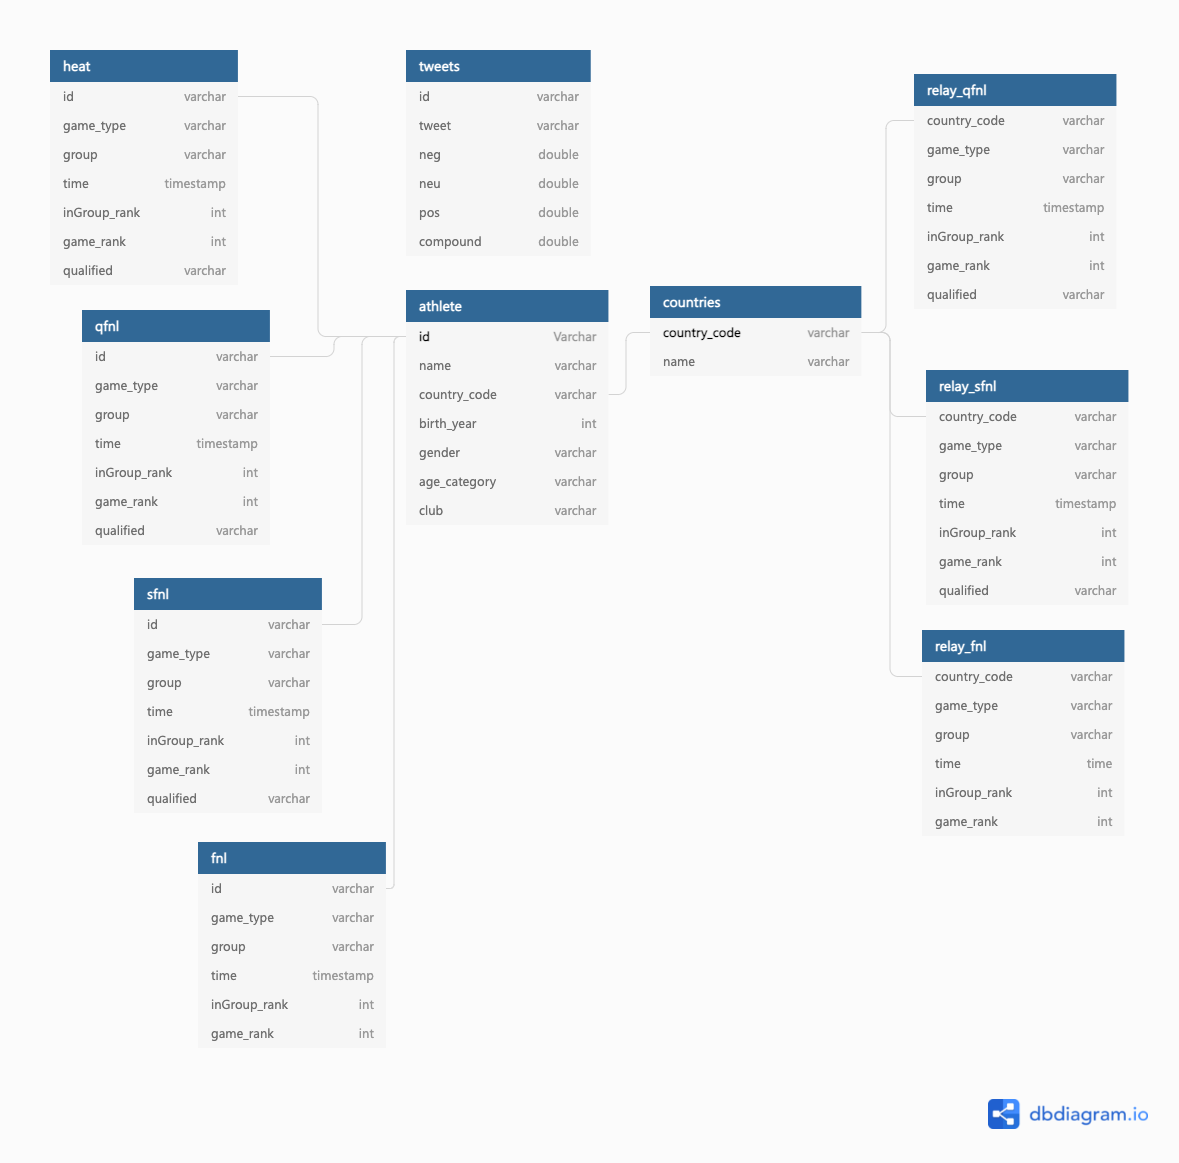

In [101]:
Image("/project/DataEngineering/graphs/shorttrack.png", width = 900)

In [102]:
# based on the schema get all the tables
heat = pd.DataFrame(w_m_game_df[w_m_game_df['level'] == 'HEAT'][['id', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game', 'qualified']].reset_index(drop = True))
qfnl = pd.DataFrame(w_m_game_df[w_m_game_df['level'] == 'QFNL'][['id', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game', 'qualified']].reset_index(drop = True))
sfnl = pd.DataFrame(w_m_game_df[w_m_game_df['level'] == 'SFNL'][['id', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game', 'qualified']].reset_index(drop = True))
fnl = pd.DataFrame(w_m_game_df[w_m_game_df['level'] == 'FNL'][['id', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game']].reset_index(drop = True))
make_checkpoint()

In [103]:
# change the columns name
heat.columns = ['id', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank', 'qualified']
qfnl.columns = ['id', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank', 'qualified']
sfnl.columns = ['id', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank', 'qualified']
fnl.columns = ['id', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank']
make_checkpoint()

In [104]:
heat

id game_type    group          time inGroup_rank  \
0    STKOR20909199801    W1000M  000100- -2.208989e+09            1   
1    STNED21405199901    W1000M  000100- -2.208989e+09            2   
2    STRUS22408200201    W1000M  000100- -2.208989e+09            3   
3    STGBR22601199601    W1000M  000100- -2.208989e+09            4   
4    STNED22509199701    W1000M  000200- -2.208989e+09            1   
..                ...       ...      ...           ...          ...   
123  STNED10610200101     M500M  000700- -2.208989e+09            4   
124  STCHN12407199401     M500M  000800- -2.208989e+09            1   
125  STITA11507199901     M500M  000800- -2.208989e+09            2   
126  STHKG12207199901     M500M  000800- -2.208989e+09            3   
127  STNED10908199502     M500M  000800- -2.208989e+09            4   

     game_rank qualified  
0            9         Q  
1           10         Q  
2           12         q  
3           22            
4            1         Q  
..         ...       ...  
123         30       PEN  
124          1         Q  
125          3         Q  
126         27            
127         30   No Time  

[128 rows x 7 columns]

In [105]:
qfnl

id game_type    group          time inGroup_rank  \
0    STCAN23010199801     W500M  000100- -2.208989e+09            4   
1    STCAN22012200301     W500M  000100- -2.208989e+09            5   
2    STHUN23112199801     W500M  000200- -2.208989e+09            1   
3    STRUS23012200101     W500M  000200- -2.208989e+09            2   
4    STUSA22801200001     W500M  000200- -2.208989e+09            3   
..                ...       ...      ...           ...          ...   
147  STUSA10705200101    M1000M  000100- -2.208989e+09            1   
148  STCHN12407199401    M1000M  000100- -2.208989e+09            2   
149  STKOR13110199801    M1000M  000100- -2.208989e+09            3   
150  STITA11507199901    M1000M  000100- -2.208989e+09            4   
151  STCAN12405199801    M1000M  000100- -2.208989e+09            5   

     game_rank qualified  
0           14       ADV  
1           18       PEN  
2            7         Q  
3            8         Q  
4            9            
..         ...       ...  
147          4         Q  
148          8         Q  
149         16       ADV  
150         16       PEN  
151         16       PEN  

[152 rows x 7 columns]

In [106]:
sfnl

id game_type    group          time inGroup_rank  game_rank  \
0   STCHN10306199701    M1000M  000100- -2.208989e+09            1          5   
1   STCHN10402200101    M1000M  000100- -2.208989e+09            2          6   
2   STTUR10603200201    M1000M  000100- -2.208989e+09            3          7   
3   STKOR10507199901    M1000M  000100- -2.208989e+09            4         10   
4   STKOR13110199801    M1000M  000100- -2.208989e+09            5         10   
..               ...       ...      ...           ...          ...        ...   
79  STNED22509199701     W500M  000200- -2.208989e+09            1          2   
80  STCHN20408199901     W500M  000200- -2.208989e+09            2          6   
81  STHUN23112199801     W500M  000200- -2.208989e+09            3          7   
82  STBEL22610199601     W500M  000200- -2.208989e+09            4          9   
83  STCHN22007199601     W500M  000200- -2.208989e+09            5         10   

   qualified  
0         QA  
1         QA  
2         QB  
3        PEN  
4        DNS  
..       ...  
79        QA  
80        QA  
81        QB  
82      ADVA  
83       PEN  

[84 rows x 7 columns]

In [107]:
fnl

id game_type    group          time inGroup_rank  game_rank
0   STNED22509199701    W1000M  -A00100 -2.208989e+09            1          1
1   STKOR20909199801    W1000M  -A00100 -2.208989e+09            2          2
2   STBEL22610199601    W1000M  -A00100 -2.208989e+09            3          3
3   STUSA20211199401    W1000M  -A00100 -2.208989e+09            4          4
4   STITA21404199001    W1000M  -A00100 -2.208989e+09            5          5
..               ...       ...      ...           ...          ...        ...
60  STCHN12407199401    M1000M  -A00100 -2.208989e+09            4          4
61  STHUN12011199501    M1000M  -A00100 -2.208989e+09            5          5
62  STNED11306199401    M1000M  -B00100 -2.208989e+09            1          6
63  STTUR10603200201    M1000M  -B00100 -2.208989e+09            2          7
64  STUSA10705200101    M1000M  -B00100 -2.208989e+09            3          8

[65 rows x 6 columns]

In [108]:
# based on the schema and get all the tables
relay_qfnl = pd.DataFrame(relay_df[relay_df['level'] == 'QFNL'][['country', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game', 'qualified']].reset_index(drop = True))
relay_sfnl = pd.DataFrame(relay_df[relay_df['level'] == 'SFNL'][['country', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game', 'qualified']].reset_index(drop = True))
relay_fnl = pd.DataFrame(relay_df[relay_df['level'] == 'FNL'][['country', 'game_type', 'group', 'timestamp', 'rank', 'rank_by_game']].reset_index(drop = True))
make_checkpoint()

In [109]:
# change the columns name
relay_qfnl.columns = ['country_code', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank', 'qualified']
relay_sfnl.columns = ['country_code', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank', 'qualified']
relay_fnl.columns = ['country_code', 'game_type', 'group', 'time', 'inGroup_rank', 'game_rank']
make_checkpoint()

In [110]:
relay_qfnl

country_code game_type   group          time inGroup_rank  game_rank  \
0           CHN   XRELAY4  000100 -2.208989e+09            1          3   
1           ITA   XRELAY4  000100 -2.208989e+09            2          4   
2           KOR   XRELAY4  000100 -2.208989e+09            3         10   
3           POL   XRELAY4  000100 -2.208989e+09            4         11   
4           NED   XRELAY4  000200 -2.208989e+09            1          1   
5           CAN   XRELAY4  000200 -2.208989e+09            2          2   
6           KAZ   XRELAY4  000200 -2.208989e+09            3          9   
7           FRA   XRELAY4  000200 -2.208989e+09            4         12   
8           HUN   XRELAY4  000300 -2.208989e+09            1          5   
9           RUS   XRELAY4  000300 -2.208989e+09            2          6   
10          USA   XRELAY4  000300 -2.208989e+09            3          7   
11          JPN   XRELAY4  000300 -2.208989e+09            4          8   

   qualified  
0          Q  
1          Q  
2             
3             
4          Q  
5          Q  
6          q  
7             
8          Q  
9          Q  
10         q  
11

In [111]:
relay_sfnl

country_code  game_type   group          time inGroup_rank  game_rank  \
0           KOR  M5000MRY4  000200 -2.208988e+09            1          1   
1           RUS  M5000MRY4  000200 -2.208988e+09            2          2   
2           NED  M5000MRY4  000200 -2.208988e+09            3          3   
3           HUN  M5000MRY4  000200 -2.208988e+09            4          7   
4           NED  W3000MRY4  000100 -2.208989e+09            1          1   
5           CHN  W3000MRY4  000100 -2.208989e+09            2          2   
6           POL  W3000MRY4  000100 -2.208989e+09            3          7   
7           ITA  W3000MRY4  000100 -2.208989e+09            4          8   
8           CAN  W3000MRY4  000200 -2.208989e+09            1          3   
9           KOR  W3000MRY4  000200 -2.208989e+09            2          4   
10          RUS  W3000MRY4  000200 -2.208989e+09            3          5   
11          USA  W3000MRY4  000200 -2.208989e+09            4          6   
12          CAN  M5000MRY4  000100 -2.208988e+09            1          4   
13          ITA  M5000MRY4  000100 -2.208988e+09            2          5   
14          JPN  M5000MRY4  000100 -2.208988e+09            3          6   
15          CHN  M5000MRY4  000100 -2.208988e+09            4          8   
16          CAN    XRELAY4  000100 -2.208989e+09            1          1   
17          ITA    XRELAY4  000100 -2.208989e+09            2          2   
18          KAZ    XRELAY4  000100 -2.208989e+09            3          5   
19          NED    XRELAY4  000100 -2.208989e+09            4          6   
20          HUN    XRELAY4  000200 -2.208989e+09            1          3   
21          CHN    XRELAY4  000200 -2.208989e+09            2          4   
22          RUS    XRELAY4  000200  0.000000e+00            3          7   
23          USA    XRELAY4  000200  0.000000e+00            4          7   

   qualified  
0         QA  
1         QA  
2         QB  
3         QB  
4         QA  
5         QA  
6         QB  
7         QB  
8         QA  
9         QA  
10        QB  
11        QB  
12        QA  
13        QA  
14        QB  
15      ADVA  
16        QA  
17        QA  
18        QB  
19        QB  
20        QA  
21        QA  
22       PEN  
23       PEN

In [112]:
relay_fnl

country_code  game_type   group          time inGroup_rank  game_rank
0           NED    XRELAY4  -B0010 -2.208989e+09            1          5
1           KAZ    XRELAY4  -B0010 -2.208989e+09            2          6
2           CAN  M5000MRY4  -A0010 -2.208988e+09            1          1
3           KOR  M5000MRY4  -A0010 -2.208988e+09            2          2
4           ITA  M5000MRY4  -A0010 -2.208988e+09            3          3
5           RUS  M5000MRY4  -A0010 -2.208988e+09            4          4
6           CHN  M5000MRY4  -A0010 -2.208988e+09            5          5
7           HUN  M5000MRY4  -B0010 -2.208988e+09            1          6
8           NED  M5000MRY4  -B0010 -2.208988e+09            2          7
9           JPN  M5000MRY4  -B0010 -2.208988e+09            3          8
10          NED  W3000MRY4  -A0010 -2.208989e+09            1          1
11          KOR  W3000MRY4  -A0010 -2.208989e+09            2          2
12          CHN  W3000MRY4  -A0010 -2.208989e+09            3          3
13          CAN  W3000MRY4  -A0010 -2.208989e+09            4          4
14          ITA  W3000MRY4  -B0010 -2.208989e+09            1          5
15          POL  W3000MRY4  -B0010 -2.208989e+09            2          6
16          RUS  W3000MRY4  -B0010  0.000000e+00            3          7
17          USA  W3000MRY4  -B0010  0.000000e+00            4          8
18          CHN    XRELAY4  -A0010 -2.208989e+09            1          1
19          ITA    XRELAY4  -A0010 -2.208989e+09            2          2
20          HUN    XRELAY4  -A0010 -2.208989e+09            3          3
21          CAN    XRELAY4  -A0010  0.000000e+00            4          4

In [113]:
# get the information needed for athlete information
athlete = pd.DataFrame(athlete_info_df[['id','name', 'country', 'birth_year', 'age_category', 'club']])
make_checkpoint()

In [114]:
# change the columns
athlete.columns = ['id', 'name', 'country_code', 'birth_year', 'age_category', 'club']
make_checkpoint()

In [115]:
# change the data type into int type
athlete.birth_year = athlete.birth_year.astype(np.int64)

In [116]:
# convert all the data frame into spark data frame
heat_df = spark.createDataFrame(heat)
qfnl_df = spark.createDataFrame(qfnl)
sfnl_df = spark.createDataFrame(sfnl)
fnl_df = spark.createDataFrame(fnl)
relay_qfnl_df = spark.createDataFrame(relay_qfnl)
relay_sfnl_df = spark.createDataFrame(relay_sfnl)
relay_fnl_df = spark.createDataFrame(relay_fnl)
countries_df = spark.createDataFrame(countries)
athlete_df = spark.createDataFrame(athlete)
make_checkpoint()

In [117]:
heat_df.printSchema()
qfnl_df.printSchema()
sfnl_df.printSchema()
fnl_df.printSchema()
relay_qfnl_df.printSchema()
relay_sfnl_df.printSchema()
relay_fnl_df.printSchema()
countries_df.printSchema()
athlete_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: double (nullable = true)
 |-- inGroup_rank: string (nullable = true)
 |-- game_rank: long (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: double (nullable = true)
 |-- inGroup_rank: string (nullable = true)
 |-- game_rank: long (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: double (nullable = true)
 |-- inGroup_rank: string (nullable = true)
 |-- game_rank: long (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: double (nullable = true)
 |-- inGroup_

In [118]:
def change_data_type(df, col, type_):
    '''
    function to change the data type for spark data frame
    '''
    return df.withColumn(col,  df[col].cast(type_))

In [119]:
athlete_df = change_data_type(athlete_df, 'birth_year', 'int')
heat_df = change_data_type(heat_df, 'time', 'timestamp')
heat_df = change_data_type(heat_df, 'inGroup_rank', 'int')
heat_df = change_data_type(heat_df, 'game_rank', 'int')
make_checkpoint()

qfnl_df = change_data_type(qfnl_df, 'time', 'timestamp')
qfnl_df = change_data_type(qfnl_df, 'inGroup_rank', 'int')
qfnl_df = change_data_type(qfnl_df, 'game_rank', 'int')
make_checkpoint()

sfnl_df = change_data_type(sfnl_df, 'time', 'timestamp')
sfnl_df = change_data_type(sfnl_df, 'inGroup_rank', 'int')
sfnl_df = change_data_type(sfnl_df, 'game_rank', 'int')
make_checkpoint()

fnl_df = change_data_type(fnl_df, 'time', 'timestamp')
fnl_df = change_data_type(fnl_df, 'inGroup_rank', 'int')
fnl_df = change_data_type(fnl_df, 'game_rank', 'int')
make_checkpoint()

relay_qfnl_df = change_data_type(relay_qfnl_df, 'time', 'timestamp')
relay_qfnl_df = change_data_type(relay_qfnl_df, 'inGroup_rank', 'int')
relay_qfnl_df = change_data_type(relay_qfnl_df, 'game_rank', 'int')
make_checkpoint()

relay_sfnl_df = change_data_type(relay_sfnl_df, 'time', 'timestamp')
relay_sfnl_df = change_data_type(relay_sfnl_df, 'inGroup_rank', 'int')
relay_sfnl_df = change_data_type(relay_sfnl_df, 'game_rank', 'int')
make_checkpoint()

relay_fnl_df = change_data_type(relay_fnl_df, 'time', 'timestamp')
relay_fnl_df = change_data_type(relay_fnl_df, 'inGroup_rank', 'int')
relay_fnl_df = change_data_type(relay_fnl_df, 'game_rank', 'int')
make_checkpoint()

In [120]:
heat_df.printSchema()
qfnl_df.printSchema()
sfnl_df.printSchema()
fnl_df.printSchema()
relay_qfnl_df.printSchema()
relay_sfnl_df.printSchema()
relay_fnl_df.printSchema()
countries_df.printSchema()
athlete_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- inGroup_rank: integer (nullable = true)
 |-- game_rank: integer (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- inGroup_rank: integer (nullable = true)
 |-- game_rank: integer (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- inGroup_rank: integer (nullable = true)
 |-- game_rank: integer (nullable = true)
 |-- qualified: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- group: string (nullable = true)
 |-- time: timestamp (nullab

In [121]:
# convert all data frames into parquet files
heat_df.write.parquet("/project/DataEngineering/parquet_files/heat.parquet", mode = 'overwrite')
qfnl_df.write.parquet("/project/DataEngineering/parquet_files/qfnl.parquet", mode = 'overwrite')
sfnl_df.write.parquet("/project/DataEngineering/parquet_files/sfnl.parquet", mode = 'overwrite')
fnl_df.write.parquet("/project/DataEngineering/parquet_files/fnl.parquet", mode = 'overwrite')
relay_qfnl_df.write.parquet("/project/DataEngineering/parquet_files/relay_qfnl.parquet", mode = 'overwrite')
relay_sfnl_df.write.parquet("/project/DataEngineering/parquet_files/relay_sfnl.parquet", mode = 'overwrite')
relay_fnl_df.write.parquet("/project/DataEngineering/parquet_files/relay_fnl.parquet", mode = 'overwrite')
countries_df.write.parquet("/project/DataEngineering/parquet_files/countries.parquet", mode = 'overwrite')
athlete_df.write.parquet("/project/DataEngineering/parquet_files/athlete.parquet", mode = 'overwrite')
make_checkpoint()

## 5.0 Write into PostgreSQL database

The schema is written into the database by a line of shell script and the selected data are all written into the database using spark.write.JDBC.

In [122]:
# create the schema
!PGPASSWORD=qwerty123 psql -h depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com -d haiyunzou21 -U haiyunzou21 -c '\i shorttrack.sql'


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

psql:shorttrack.sql:1: NOTICE:  drop cascades to 10 other objects
DETAIL:  drop cascades to table shorttrack.countries
drop cascades to table shorttrack.athlete
drop cascades to table shorttrack.relay_qfnl
drop cascades to table shorttrack.relay_sfnl
drop cascades to table shorttrack.relay_fnl
drop cascades to table shorttrack.h

In [123]:
# read all the tables
heat = spark.read.parquet("/project/DataEngineering/parquet_files/heat.parquet")
qfnl = spark.read.parquet("/project/DataEngineering/parquet_files/qfnl.parquet")
sfnl = spark.read.parquet("/project/DataEngineering/parquet_files/sfnl.parquet")
fnl = spark.read.parquet("/project/DataEngineering/parquet_files/fnl.parquet")
relay_qfnl = spark.read.parquet("/project/DataEngineering/parquet_files/relay_qfnl.parquet")
relay_sfnl = spark.read.parquet("/project/DataEngineering/parquet_files/relay_sfnl.parquet")
relay_fnl = spark.read.parquet("/project/DataEngineering/parquet_files/relay_fnl.parquet")
countries = spark.read.parquet("/project/DataEngineering/parquet_files/countries.parquet")
athlete = spark.read.parquet("/project/DataEngineering/parquet_files/athlete.parquet")
make_checkpoint()

In [124]:
# information for log into postgresql
postgres_uri = "jdbc:postgresql://depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com:5432/haiyunzou21"
user = "haiyunzou21"
password = "qwerty123"

In [125]:
# write each table into the database
countries.write.jdbc(url=postgres_uri, table="shorttrack.countries", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
athlete.write.jdbc(url=postgres_uri, table="shorttrack.athlete", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
heat.write.jdbc(url=postgres_uri, table="shorttrack.heat", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
qfnl.write.jdbc(url=postgres_uri, table="shorttrack.qfnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
sfnl.write.jdbc(url=postgres_uri, table="shorttrack.sfnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
fnl.write.jdbc(url=postgres_uri, table="shorttrack.fnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
relay_qfnl.write.jdbc(url=postgres_uri, table="shorttrack.relay_qfnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
relay_sfnl.write.jdbc(url=postgres_uri, table="shorttrack.relay_sfnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()
relay_fnl.write.jdbc(url=postgres_uri, table="shorttrack.relay_fnl", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
make_checkpoint()

## 5.1 SQL query

As identified at the beginning, we intended to build a data querying system which can help with the decision making for each national STK team in their training and gaming strategy. In this section, two SQL query examples are given to illustrate such utilities.

The first SQL query is used to see the time and ranking range for each country in each game type. This query can be used to check if the strength of each athlete in the country is evenly distributed. For example, if the time and rank range are both very small, this country has a relatively even team where the no athletes perform extremely outstanding or especially poor. On the other hand, if the time and rank range are both very large, this may suggest that the team might have one or more very talented athlete on this particular game where he or she can largely outperform their colleges. This data can be a very useful guidance for the daily training within each team as it allows the coaches to see the team's strength and weaknesses and adjust training strategy accordingly.

In [126]:
sql1 = '''
SELECT country_code, game_type, EXTRACT(EPOCH FROM (max(time) - min(time))) AS time_difference, (max(game_rank) - min(game_rank)) AS rank_difference, count(distinct name) as number_of_athletes
FROM shorttrack.athlete as a
JOIN (select id, time, game_type, game_rank from shorttrack.heat
Union
select id, time, game_type, game_rank from shorttrack.qfnl
Union
select id, time, game_type, game_rank from shorttrack.sfnl
Union
select id, time, game_type, game_rank from shorttrack.fnl) as t

ON a.id = t.id

Group by game_type, country_code
Order by game_type, time_difference DESC
'''

In [127]:
sql1_df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("query", sql1) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

sql1_df.printSchema()

root
 |-- country_code: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- time_difference: double (nullable = true)
 |-- rank_difference: integer (nullable = true)
 |-- number_of_athletes: long (nullable = true)



In [128]:
sql1_df = sql1_df.toPandas()

In [129]:
sql1_df

country_code game_type  time_difference  rank_difference  \
0           ITA    M1000M       130.039000               15   
1           HUN    M1000M       115.248001               22   
2           NED    M1000M       102.490000               14   
3           JPN    M1000M        85.574000                9   
4           CAN    M1000M        84.771000                7   
..          ...       ...              ...              ...   
91          HUN     W500M         1.057001               18   
92          POL     W500M         0.398000                3   
93          GBR     W500M         0.000000                0   
94          CRO     W500M         0.000000                0   
95          CZE     W500M         0.000000                0   

    number_of_athletes  
0                    2  
1                    3  
2                    3  
3                    2  
4                    2  
..                 ...  
91                   2  
92                   3  
93                   1  
94                   1  
95                   1  

[96 rows x 5 columns]

The second SQL query is used to detect how each athlete performed in each type of game they have attended by calculating their overall average ranking on each game level. Each athlete has their strengths, and weaknesses, this table would enable the coaches to know the athletes better and train them with more targeted methods. For example, if they are good at long-distance games, does it mean they lack explosive force? Or, if they are good at short distances do they lack endurance? More important, this data can also help the athletes to achieve better overall grades as a team. With the knowledge of each athlete's strong and weak game, the coaches can now make a smarter task allocation in future competitions.

In [130]:
sql2 = '''
SELECT name, game_type, ROUND(CAST(avg(game_rank) AS FLOAT)) as average_rank
FROM shorttrack.athlete as a
JOIN (select id, time, game_type, game_rank from shorttrack.heat
Union
select id, time, game_type, game_rank from shorttrack.qfnl
Union
select id, time, game_type, game_rank from shorttrack.sfnl
Union
select id, time, game_type, game_rank  from shorttrack.fnl) as t

ON a.id = t.id

Group by name, game_type

Order by name, game_type, average_rank
'''

In [131]:
sql2_df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("query", sql2) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

sql2_df.printSchema()

root
 |-- name: string (nullable = true)
 |-- game_type: string (nullable = true)
 |-- average_rank: double (nullable = true)



In [132]:
sql2_df = sql2_df.toPandas()

In [133]:
sql2_df

name game_type  average_rank
0         akar furkan    M1000M          11.0
1     ascic valentina    W1500M          15.0
2     ascic valentina     W500M          27.0
3    ayrapetyan denis    M1000M          31.0
4    ayrapetyan denis    M1500M           6.0
..                ...       ...           ...
195     zhang chutong    W1000M          12.0
196     zhang chutong    W1500M          12.0
197      zhang tianyi    M1500M          34.0
198      zhang yuting    W1500M          12.0
199      zhang yuting     W500M           8.0

[200 rows x 3 columns]

In [134]:
sql3 = '''SELECT country_code,game_type, average(time)
FROM shorttrack.athlete as a
JOIN (select id, time, game_type from shorttrack.heat
Union
select id, time, game_type from shorttrack.qfnl
Union
select id, time, game_type from shorttrack.sfnl
Union
select id, time, game_type from shorttrack.fnl) as t

ON a.id = t.id

Group by game_type, country_code
Order by difference DESC
'''

# 6.0 Limitations and Further steps

Admittedly, due to time and space constraints, there are some limitations to our research. Firstly, all of our data were based on STK games from only the 2022 Beijing  Winter Olympics. While it's true that this is the most recent and official statistic, in practice we need to consider the contingency of sporting events. Therefore, we believe that adding relevant historical data such as recent word STK championships may further improve the practical application effect of the model. Moreover, the Twitter post data we gathered are not large enough to carry out a more proper sentiment analysis due to the limitations we set when mining tweets. Besides, due to lack of text information, we left out the preprocessing part for the sentiment analysis to avoid a further loss of text. Given more text data, we could develop a tweet specified NLP data preprocessing method for better sentiment analysis results.

For future steps, to actually apply our data engineering system in practical utility, we suggest that more comprehensive data should be gathered and the schema should therefore be expanded accordingly.  Finally， we believe this report can be generalised to more sports beyond STK especially racing ones such as athletics and swimming.

# 7.0 Conclusion

In conclusion, for our group coursework focusing on the winter olmpic short track speed skating, we have gathered related data from three sources. We have collected full game results of STK races from the International Olympic Committee (IOC) official website through web scraping and regular expression. In order to enrich the dataset, personal information of the Olympic STK athletes have been gathered from the STO website. Moreover, we have used twitter API for collecting additional recent tweets in the related topic so as to have a more comprehensive view on the STK races. Although we are having limited amount of tweets in our database, we will expand on it and NLP sentiment analysis will be carried out at the later stage. After the intial collection, transformation has been applied on the data, followed by storing the data in parquet format in the postgres databased according to the designed schema.

During the whole process, data version control has been implemented for better data lineage practice and source version control has been applied through Git for improving process transparency as there is collaboration on this group coursework. Terraform has also been set up with Github actions and the Terraform CLI has been configured to automate the workflow.

##  Reference

Coursera, (2021). What Is a Data Engineer?: A Guide to This In-Demand Career Available from: https://www.coursera.org/articles/what-does-a-data-engineer-do-and-how-do-i-become-one. (Accessed: 11 April 2022)

(2022). BEIJING 2022 SHORT TRACK SPEED SKATING RESULTS Avaiable from: https://olympics.com/en/olympic-games/beijing-2022/results/short-track-speed-skating (Accessed: 11 April 2022)

## Appendix

We mainly carried out the project management by meetings. Below are the minutes of our group meetings including attendance, discussion, task allocation recordings.

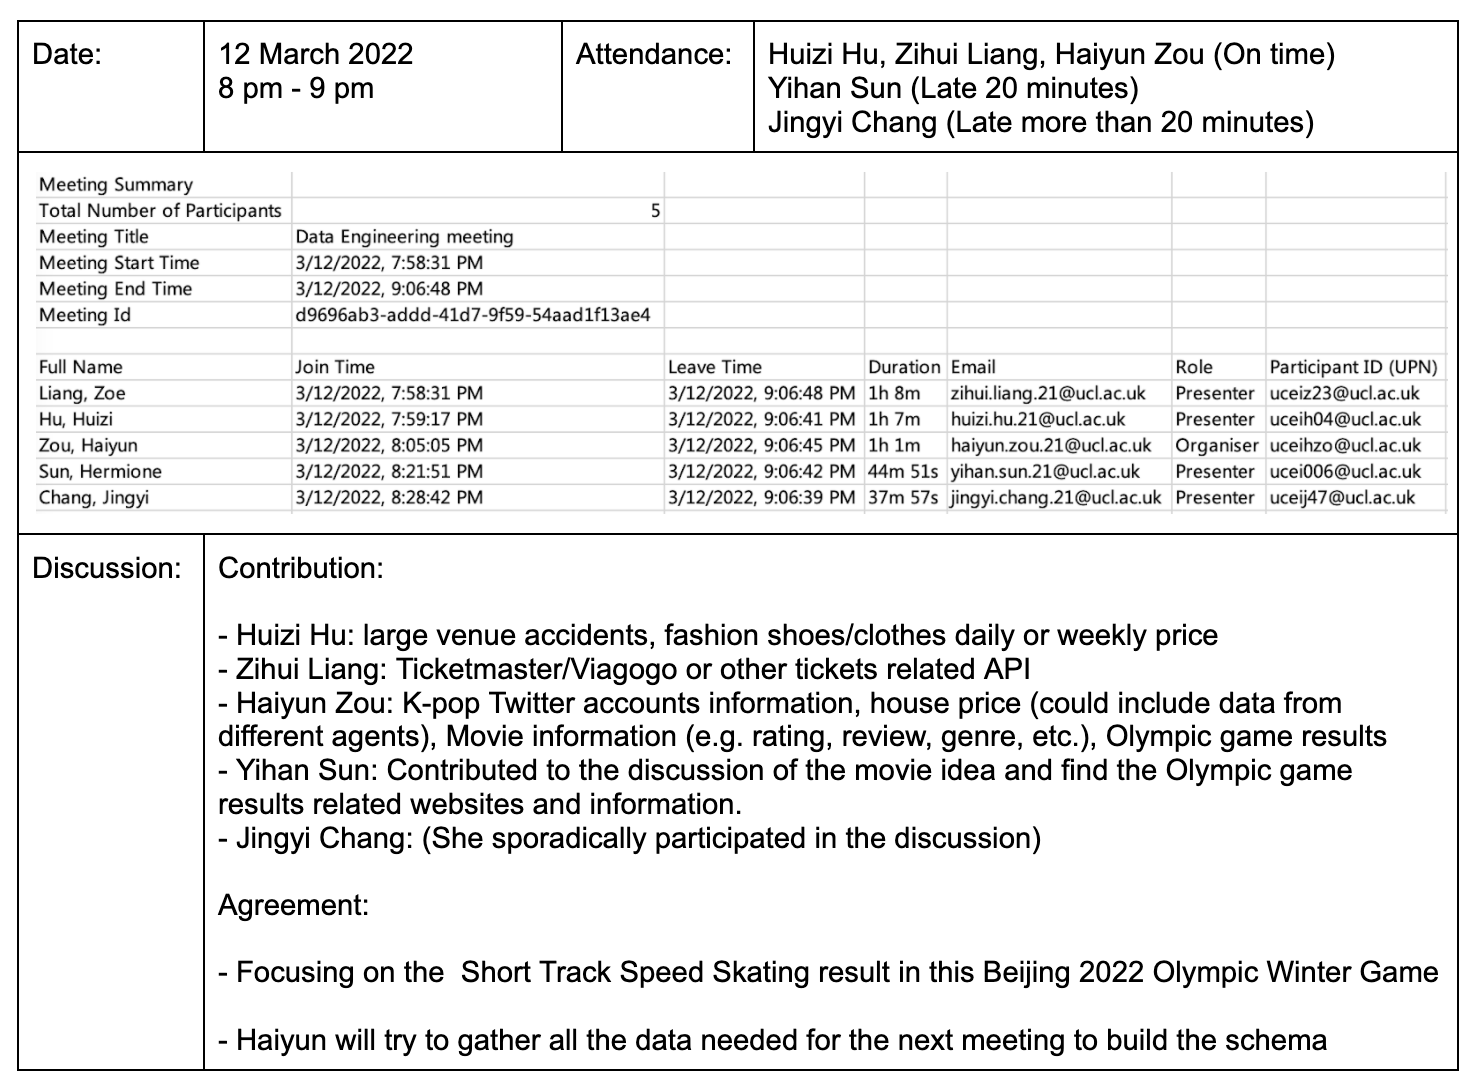

In [135]:
Image("/project/DataEngineering/graphs/meeting_minute_1.png", width = 800)

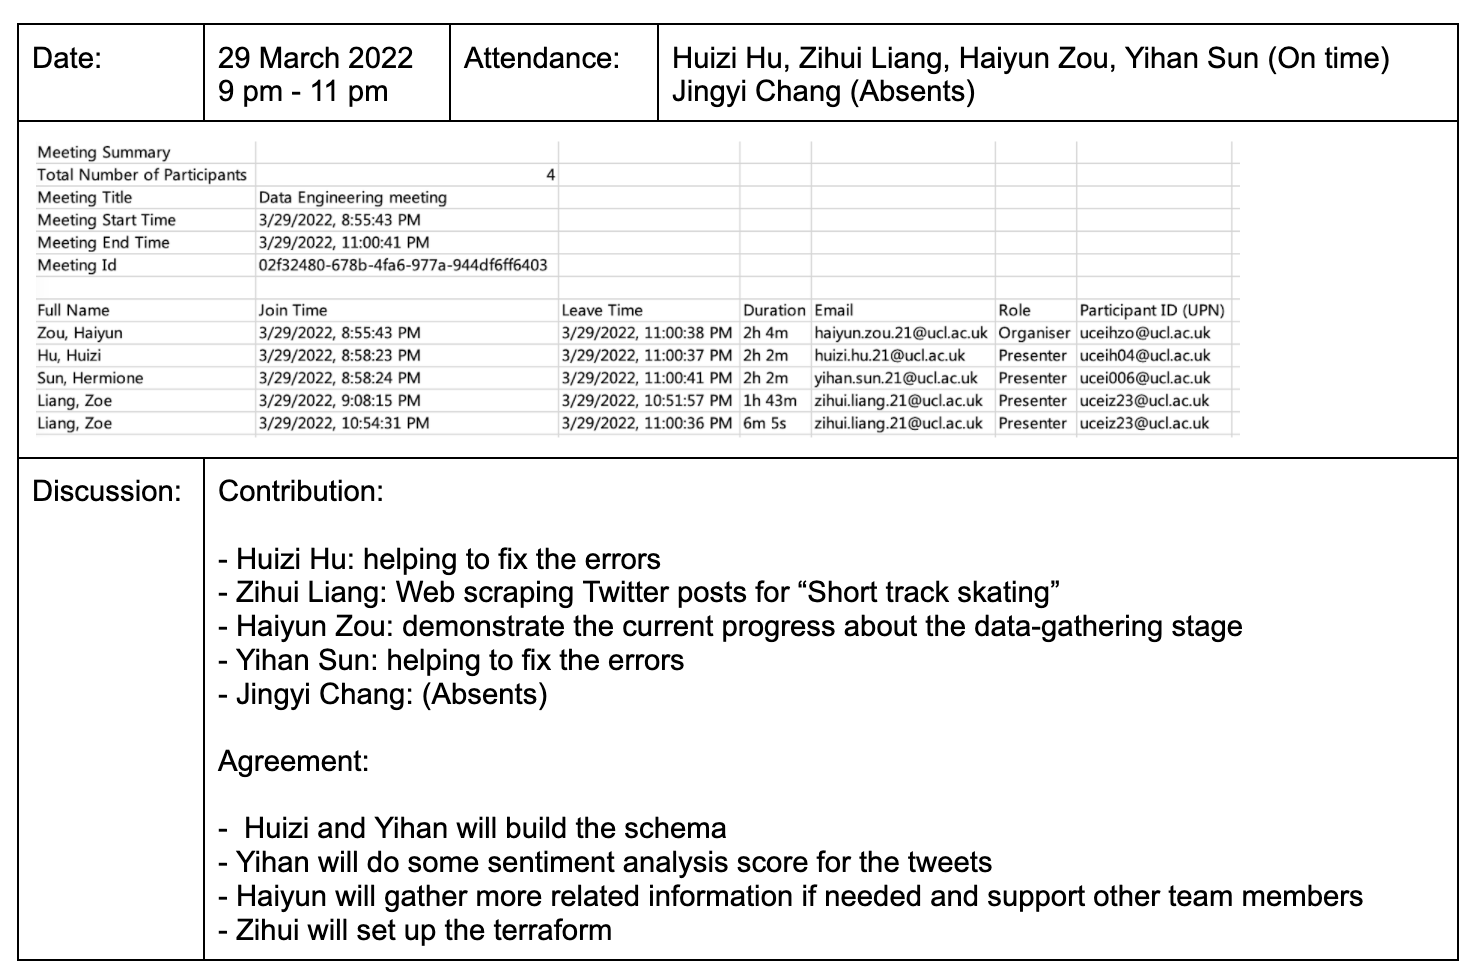

In [136]:
Image("/project/DataEngineering/graphs/meeting_minute_2.png", width = 800)

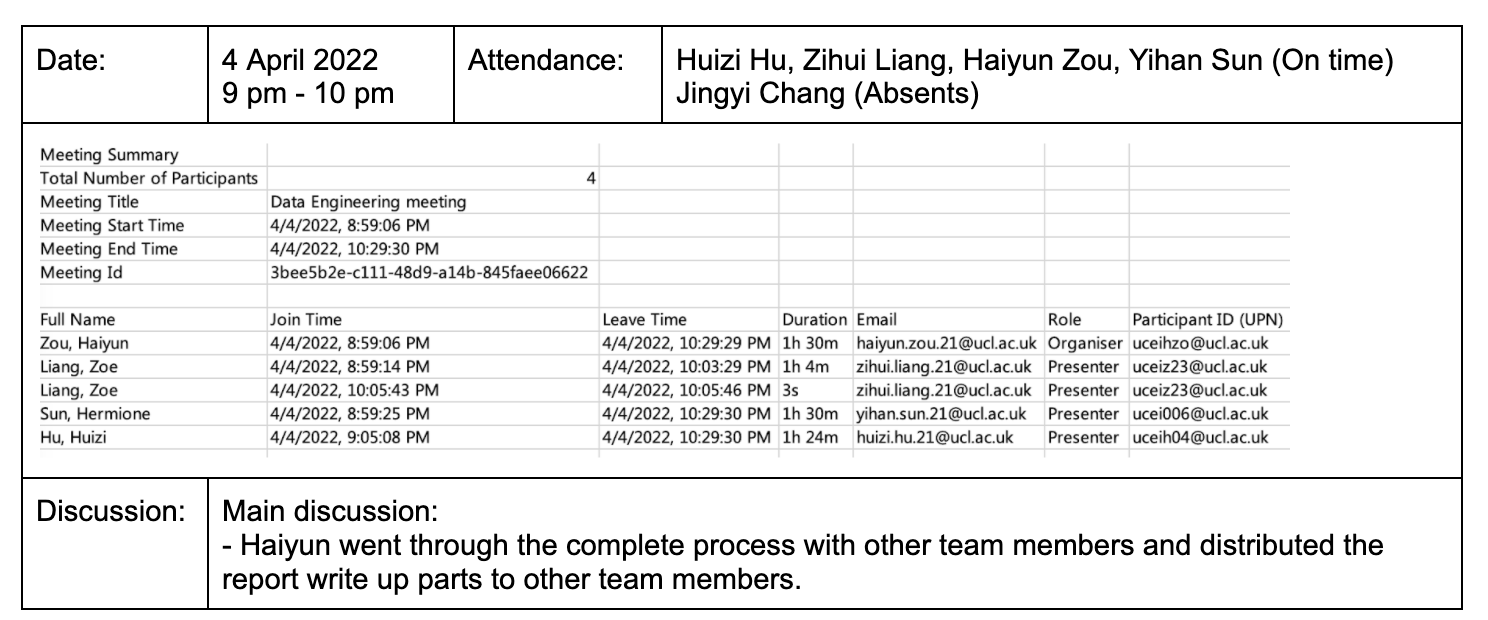

In [137]:
Image("/project/DataEngineering/graphs/meeting_minute_3.png", width = 800)